#Libraries



In [232]:
import pandas as pd

In [233]:
import seaborn as sns
import pandas as pd
!pip install pingouin
import pingouin as pg
import numpy as np
!pip install pandas-summary
from pandas_summary import DataFrameSummary
dfs = DataFrameSummary
import re

#Introduction

In [234]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Count missing values in columns

In [235]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [236]:
df.isna().sum().sum()

869

Delete columns

Axis - columns or rows

Inplace - заміщення попереднього датасету виправленим

In [237]:
df.drop('deck', axis='columns', inplace=True)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


Mean and STD of age across different pclasses

In [238]:
df['pclass'].value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

Для групування - списки

In [239]:
df.groupby('pclass')['age'].agg(['mean', 'std'])

,mean,std
pclass,,
1,38.233441,14.802856
2,29.877630,14.001077
3,25.140620,12.495398


Distribution = histogram
3 in 1

<Axes: xlabel='age', ylabel='Count'>

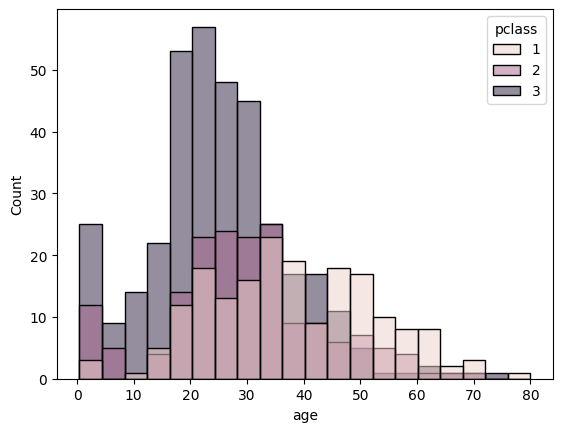

In [240]:
sns.histplot(data=df, x='age', hue='pclass')

1 in 3 - displot

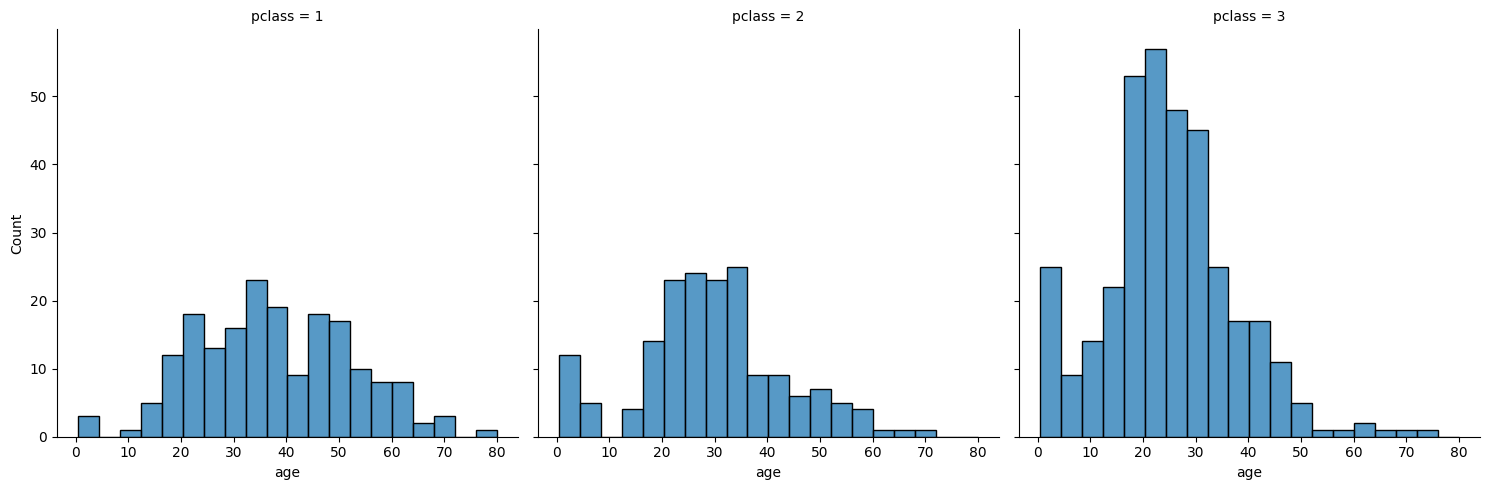

In [241]:
sns.displot(data=df, x='age', col='pclass')

Means of age with respect to pclass and sex

68 = SEM

95 = 95CI

<ipython-input-242-a1d1c68d4405>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(data=df, x='pclass', y='age', ci=68)


<Axes: xlabel='pclass', ylabel='age'>

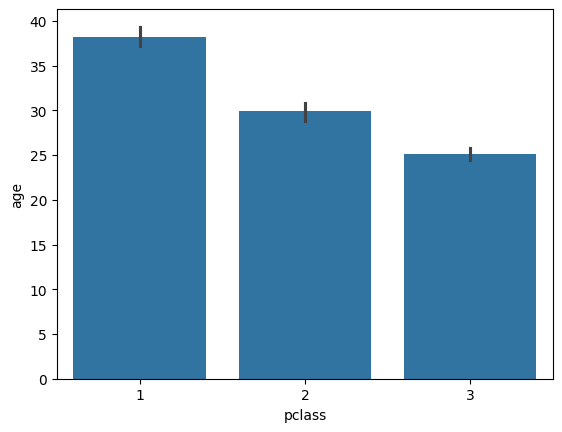

In [242]:
sns.barplot(data=df, x='pclass', y='age', ci=68)

Create new dataframe with 2 columns - pclass, age

In [243]:
data=df[['pclass', 'age']]
data

,pclass,age
0,3,22.0
1,1,38.0
2,3,26.0
3,1,35.0
4,3,35.0
...,...,...
886,2,27.0
887,1,19.0
888,3,NaN
889,1,26.0


In [244]:
pg.normality(data=df, dv='age', group='pclass')

,W,pval,normal
pclass,,,
3,0.973437,0.000004,False
1,0.991694,0.364306,True
2,0.976952,0.005649,False


Outliers можуть впливати результати

<Axes: xlabel='pclass', ylabel='age'>

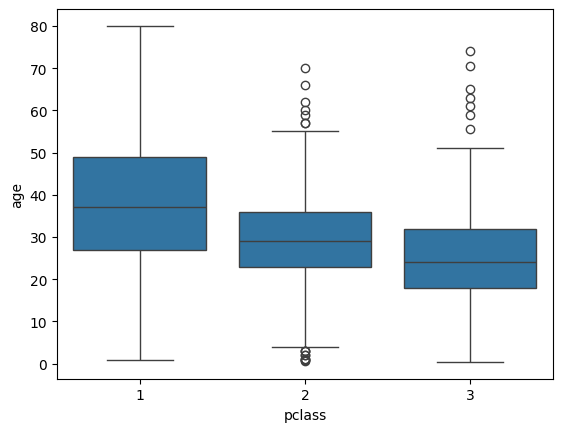

In [245]:
sns.boxplot(data=df, x='pclass', y='age')

Найпростіше - визначити IQR, від Q1/Q3-+1,5IQR

Як видалити спостереження з аутлаєрами?

Привести екстимальні значення до максимального - інсуризація - аутлаєри, які перебільшують Q3+1,5IQR

In [246]:
pg.anova(data=df, dv='age', between='pclass')

,Source,ddof1,ddof2,F,p-unc,np2
0,pclass,2,711,57.443484,7.487984e-24,0.139107


In [247]:
pg.kruskal(data=df, dv='age', between='pclass', detailed=True)

,Source,ddof1,H,p-unc
Kruskal,pclass,2,95.994792,1.428880e-21


In [248]:
pg.pairwise_ttests(data=df, dv='age', between='pclass', padjust='bonf')

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,pclass,1,2,False,True,5.496279,356.897221,two-sided,7.396039e-08,2.218812e-07,bonf,1.48e+05,0.578156
1,pclass,1,3,False,True,10.293347,325.228061,two-sided,1.073227e-21,3.219680e-21,bonf,4.166e+19,0.980658
2,pclass,2,3,False,True,3.777012,308.828778,two-sided,1.903868e-04,5.711604e-04,bonf,96.648,0.363671


#DataFrame

Creating numpy list

In [249]:
np.random.seed(100)
arr = np.random.randint(0, 100, (5, 3))
arr

array([[ 8, 24, 67],
       [87, 79, 48],
       [10, 94, 52],
       [98, 53, 66],
       [98, 14, 34]])

Creating dataframe from array

In [250]:
df = pd.DataFrame(arr)
df

,0,1,2
0,8,24,67
1,87,79,48
2,10,94,52
3,98,53,66
4,98,14,34


Creating custom columns and rows

In [251]:
rownames = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']
columnnames = ['Jan', 'Feb', 'Mar']
df = pd.DataFrame(arr, index=rownames, columns=columnnames)
df

,Jan,Feb,Mar
Mon,8,24,67
Tue,87,79,48
Wed,10,94,52
Thu,98,53,66
Fri,98,14,34


Creating dataframe from dictionary

In [252]:
mydict = {
    'Jan': [1, 2, 3, 4, 5],
    'Feb': [10, 20, 30, 40, 50],
    'Mar': [15, 25, 35, 45, 55],
}

df = pd.DataFrame(mydict, index=['Mon', 'Tue', 'Wed', 'Thu', 'Fri'])
df

,Jan,Feb,Mar
Mon,1,10,15
Tue,2,20,25
Wed,3,30,35
Thu,4,40,45
Fri,5,50,55


Exporting data from csv file

In [253]:
df = pd.read_csv('/content/drive/MyDrive/stat data/Data/ToothGrowth.csv')
df.head(10)

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5
5,10.0,VC,0.5
6,11.2,VC,0.5
7,11.2,VC,0.5
8,5.2,VC,0.5
9,7.0,VC,0.5


In [254]:
df.tail(10)

,len,supp,dose
50,25.5,OJ,2.0
51,26.4,OJ,2.0
52,22.4,OJ,2.0
53,24.5,OJ,2.0
54,24.8,OJ,2.0
55,30.9,OJ,2.0
56,26.4,OJ,2.0
57,27.3,OJ,2.0
58,29.4,OJ,2.0
59,23.0,OJ,2.0


Shape of dataframe - number of rows and columns

In [255]:
df.shape

(60, 3)

.values for getting underlying numpy array

In [256]:
values = df.values
values

array([[4.2, 'VC', 0.5],
       [11.5, 'VC', 0.5],
       [7.3, 'VC', 0.5],
       [5.8, 'VC', 0.5],
       [6.4, 'VC', 0.5],
       [10.0, 'VC', 0.5],
       [11.2, 'VC', 0.5],
       [11.2, 'VC', 0.5],
       [5.2, 'VC', 0.5],
       [7.0, 'VC', 0.5],
       [16.5, 'VC', 1.0],
       [16.5, 'VC', 1.0],
       [15.2, 'VC', 1.0],
       [17.3, 'VC', 1.0],
       [22.5, 'VC', 1.0],
       [17.3, 'VC', 1.0],
       [13.6, 'VC', 1.0],
       [14.5, 'VC', 1.0],
       [18.8, 'VC', 1.0],
       [15.5, 'VC', 1.0],
       [23.6, 'VC', 2.0],
       [18.5, 'VC', 2.0],
       [33.9, 'VC', 2.0],
       [25.5, 'VC', 2.0],
       [26.4, 'VC', 2.0],
       [32.5, 'VC', 2.0],
       [26.7, 'VC', 2.0],
       [21.5, 'VC', 2.0],
       [23.3, 'VC', 2.0],
       [29.5, 'VC', 2.0],
       [15.2, 'OJ', 0.5],
       [21.5, 'OJ', 0.5],
       [17.6, 'OJ', 0.5],
       [9.7, 'OJ', 0.5],
       [14.5, 'OJ', 0.5],
       [10.0, 'OJ', 0.5],
       [8.2, 'OJ', 0.5],
       [9.4, 'OJ', 0.5],
       [16.5, 'OJ', 0

Exporting data from txt file

In [257]:
df = pd.read_table('/content/drive/MyDrive/stat data/Data/ToothGrowth.txt', sep=',')
df.head()

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5


Exporting data from internet

In [258]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/ToothGrowth.csv")
df.head()

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5


Convert the following lists to a Pandas DataFrame with two columns and an index

In [259]:
index = [1,2,3,4,5]
col1 = list('abcde')
col2 = list('pqrst')

In [260]:
pd.DataFrame(data={'col1': list('abcde'), 'col2': list('pqrst')}, index=[1, 2, 3, 4, 5])

,col1,col2
1,a,p
2,b,q
3,c,r
4,d,s
5,e,t


###Challenge

Column names - 'name', 'age'

In [261]:
lst = [['Bunny', 25], ['Sunny', 30],
       ['Funny', 26], ['Hunny', 22]]

In [262]:
lst = {'name':['Bunny', 'Sunny', 'Funny', 'Hunny'],
       'age': [25, 30, 26, 22]}

In [263]:
pd.DataFrame.from_dict(lst)

,name,age
0,Bunny,25
1,Sunny,30
2,Funny,26
3,Hunny,22


Series and it`s relation with dataframe

One column


In [264]:
df = pd.DataFrame(np.random.randint(1,100, (5,4)), columns=list('abcd'))
df

,a,b,c,d
0,25,16,61,59
1,17,10,94,87
2,3,28,5,32
3,2,14,84,5
4,92,60,68,8


In [265]:
df['a']

0    25
1    17
2     3
3     2
4    92
Name: a, dtype: int64

In [266]:
df['a'][:3]

0    25
1    17
2     3
Name: a, dtype: int64

.values to get numpy array

In [267]:
df['a'][0:3].values

array([25, 17,  3])

Convertation to list

In [268]:
df['a'][0:3].values.tolist()

[25, 17, 3]

Creating series object

Without index - default, starts with 0

In [269]:
data = np.arange(10)
index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

ser = pd.Series(data=data, name='numbers')
ser

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
Name: numbers, dtype: int64

In [270]:
np.arange(20)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

Backwards

In [271]:
np.arange(50, 0, -1)

array([50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34,
       33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17,
       16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

Series are vectorized - multiply every item by multiplying all series

In [272]:
ser = pd.Series(data=data, index=index, name='numbers')
ser

a    0
b    1
c    2
d    3
e    4
f    5
g    6
h    7
i    8
j    9
Name: numbers, dtype: int64

In [273]:
ser * 2

a     0
b     2
c     4
d     6
e     8
f    10
g    12
h    14
i    16
j    18
Name: numbers, dtype: int64

Extracting an item

In [274]:
a_list = list(range(10))
a_list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [275]:
a_list * 2

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [276]:
ser['b']

1

In [277]:
ser

a    0
b    1
c    2
d    3
e    4
f    5
g    6
h    7
i    8
j    9
Name: numbers, dtype: int64

To extract more than one item - item labels in list - list as an argument - arguments in square brackets

In [278]:
ser[[3, 5]]

d    3
f    5
Name: numbers, dtype: int64

In [279]:
ser[['a', 'b']]

a    0
b    1
Name: numbers, dtype: int64

Extracting one column from dataframe - becomes a series

Dataframe - column-wise arrangement of series

Creating series from dict

In [280]:
d1 = {'a': 0, 'b':1, 'c':3}
d2 = {'b': 0, 'c':1, 'd':3}

In [281]:
ser1 = pd.Series(d1)
ser2 = pd.Series(d2)
ser1

a    0
b    1
c    3
dtype: int64

In [282]:
ser2

b    0
c    1
d    3
dtype: int64

Addition

In [283]:
ser1 + ser2

a    NaN
b    1.0
c    4.0
d    NaN
dtype: float64

For computation - using zero instead of missing value

In [284]:
ser2.add(ser1, fill_value=0)

a    0.0
b    1.0
c    4.0
d    3.0
dtype: float64

Computing differences between successive elements

In [285]:
np.random.seed(101)
ser = pd.Series(np.random.randint(1,100, 10))
ser

0    96
1    12
2    82
3    71
4    64
5    88
6    76
7    10
8    78
9    41
dtype: int64

In [286]:
np.random.seed(101)
ser = pd.Series(np.random.randint(1,100, 10))

In [287]:
ser[1:].values - ser[:-1].values

array([-84,  70, -11,  -7,  24, -12, -66,  68, -37])

In [288]:
ser[1:].values

array([12, 82, 71, 64, 88, 76, 10, 78, 41])

In [289]:
ser[1:] - ser[:-1]

0    NaN
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    NaN
dtype: float64

In [290]:
ser[:-1]

0    96
1    12
2    82
3    71
4    64
5    88
6    76
7    10
8    78
dtype: int64

In [291]:
ser1 = pd.Series([0, 1, 2])
ser2 = pd.Series([3, 4, 5])
ser2 - ser1

0    3
1    3
2    3
dtype: int64

In [292]:
ser1

0    0
1    1
2    2
dtype: int64

In [293]:
ser2

0    3
1    4
2    5
dtype: int64

In [294]:
ser.diff()[1:].tolist()

[-84.0, 70.0, -11.0, -7.0, 24.0, -12.0, -66.0, 68.0, -37.0]

#Inspecting dataframes

In [295]:
df = pd.read_csv("/content/drive/MyDrive/stat data/Data/churn.csv")
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


How many rows and columns?

In [296]:
df.shape

(3333, 21)

Top and bottom rows

In [297]:
df.head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [298]:
df.tail(6)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3327,SC,79,415,348-3830,no,no,0,134.7,98,22.90,...,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


Dataframe info - datatypes, no null records. memory usage

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Datatypes

In [300]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

Changing boolean to int datatype

In [301]:
df['churn'] = df['churn'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

#Renaming columns

Columns names

In [302]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [303]:
df.rename(columns={'account length': 'account_legnth'})
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


Copy is returned. For changing - inplace=True

In [304]:
df.rename(columns={'account length': 'account_length'}, inplace=True)
df.columns

Index(['state', 'account_length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

Changing case in all columns

In [305]:
df.rename(str.upper, axis='columns').head()

,STATE,ACCOUNT_LENGTH,AREA CODE,PHONE NUMBER,INTERNATIONAL PLAN,VOICE MAIL PLAN,NUMBER VMAIL MESSAGES,TOTAL DAY MINUTES,TOTAL DAY CALLS,TOTAL DAY CHARGE,...,TOTAL EVE CALLS,TOTAL EVE CHARGE,TOTAL NIGHT MINUTES,TOTAL NIGHT CALLS,TOTAL NIGHT CHARGE,TOTAL INTL MINUTES,TOTAL INTL CALLS,TOTAL INTL CHARGE,CUSTOMER SERVICE CALLS,CHURN
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Replacing all space character by _ - lambda

In [306]:
df.rename(lambda x: x.replace(" ", "_"), axis='columns').head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


###Challenge

In [307]:
df = pd.read_csv("/content/drive/MyDrive/stat data/Data/churn.csv")

In [308]:
df.rename(str.title, axis='columns', inplace=True)
df

,State,Account Length,Area Code,Phone Number,International Plan,Voice Mail Plan,Number Vmail Messages,Total Day Minutes,Total Day Calls,Total Day Charge,...,Total Eve Calls,Total Eve Charge,Total Night Minutes,Total Night Calls,Total Night Charge,Total Intl Minutes,Total Intl Calls,Total Intl Charge,Customer Service Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


#Summary statistics

In [309]:
df = pd.read_csv("/content/drive/MyDrive/stat data/Data/churn.csv")
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Essential Operations

In [310]:
df = pd.read_csv("/content/drive/MyDrive/stat data/Data/churn.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


View unique items

In [311]:
df['state'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

Number of unique items

In [312]:
df['state'].nunique()

51

Number of occurences of each item

In [313]:
df['state'].value_counts()

state
WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: count, dtype: int64

Частота

In [314]:
df['state'].value_counts(normalize=True)

state
WV    0.031803
MN    0.025203
NY    0.024902
AL    0.024002
WI    0.023402
OH    0.023402
OR    0.023402
WY    0.023102
VA    0.023102
CT    0.022202
MI    0.021902
ID    0.021902
VT    0.021902
TX    0.021602
UT    0.021602
IN    0.021302
MD    0.021002
KS    0.021002
NC    0.020402
NJ    0.020402
MT    0.020402
CO    0.019802
NV    0.019802
WA    0.019802
RI    0.019502
MA    0.019502
MS    0.019502
AZ    0.019202
FL    0.018902
MO    0.018902
NM    0.018602
ME    0.018602
ND    0.018602
NE    0.018302
OK    0.018302
DE    0.018302
SC    0.018002
SD    0.018002
KY    0.017702
IL    0.017402
NH    0.016802
AR    0.016502
GA    0.016202
DC    0.016202
HI    0.015902
TN    0.015902
AK    0.015602
LA    0.015302
PA    0.013501
IA    0.013201
CA    0.010201
Name: proportion, dtype: float64

Getting first rows order by a given column

In [315]:
df.nlargest(5, 'account length')

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
817,UT,243,510,355-9360,no,no,0,95.5,92,16.24,...,63,13.91,264.2,118,11.89,6.6,6,1.78,2,False
1408,NM,232,408,386-9177,no,no,0,165.6,104,28.15,...,115,16.65,118.3,77,5.32,11.8,3,3.19,1,False
1551,MI,225,415,371-2500,no,no,0,165.4,106,28.12,...,109,23.26,210.0,93,9.45,8.7,3,2.35,0,True
1751,WY,225,415,374-1213,no,no,0,182.7,142,31.06,...,63,20.95,218.0,103,9.81,8.8,2,2.38,1,False
416,DE,224,510,361-6563,yes,no,0,171.5,99,29.16,...,103,13.60,212.4,102,9.56,5.0,2,1.35,1,True


Drop a column

Inplace!

In [316]:
df.drop(columns='churn')

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


In [317]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Drop records by index

In [318]:
df.drop(index=[0, 1, 2])

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


###Challenge

* What are the categories in 'international plan' column?
* Count them
* Plot the distribution of categories
* Analyze how important is the international plan with respect to Churn? Can you make any conclusion?
* Select 2 columns 'state' and 'total day minutes' from dataframe df and assign the result to new variables new_data
* What 3 state have the longest average time spend on a call during the day time?

In [319]:
df['international plan'].unique()

array(['no', 'yes'], dtype=object)

In [320]:
df['international plan'].nunique()

2

In [321]:
df['international plan'].value_counts()

international plan
no     3010
yes     323
Name: count, dtype: int64

<Axes: xlabel='international plan', ylabel='count'>

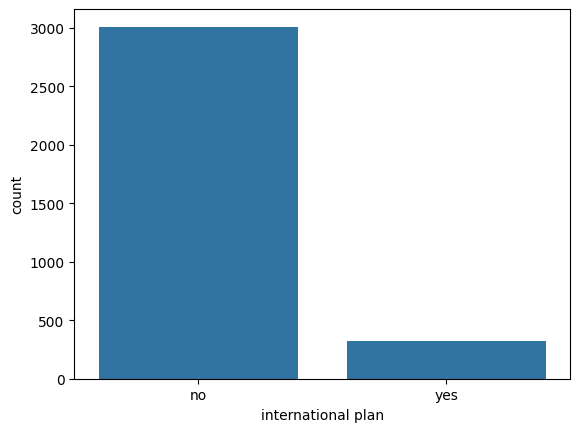

In [322]:
sns.countplot(data=df, x='international plan')

In [323]:
data = df.groupby('state')['total day minutes'].agg('mean')
data.sort_values(ascending=False, inplace=True)
data.head(3)

state
MD    197.228571
IN    196.525352
NJ    196.225000
Name: total day minutes, dtype: float64

#Selecting data

Indexers:

* []
* .loc - location
* .iloc - integer location

[] - має певні обмеження, зазвичай використовують для одного-двох стовпчиків

In [324]:
df = pd.read_csv('/content/drive/MyDrive/stat data/9. Pandas selection/sample_data.csv')
df

,name,state,color,food,age,height,score
0,Jane,NY,blue,Steak,30,165,4.6
1,Niko,TX,green,Lamb,2,70,8.3
2,Aaron,FL,red,Mango,12,120,9.0
3,Penelope,AL,white,Apple,4,80,3.3
4,Dean,AK,gray,Cheese,32,180,1.8
5,Christina,TX,black,Melon,33,172,9.5
6,Cornelia,TX,red,Beans,69,150,2.2


Інколи - замість індексів певні значення

In [325]:
df = pd.read_csv('/content/drive/MyDrive/stat data/9. Pandas selection/sample_data.csv', index_col='name')
df

,state,color,food,age,height,score
name,,,,,,
Jane,NY,blue,Steak,30,165,4.6
Niko,TX,green,Lamb,2,70,8.3
Aaron,FL,red,Mango,12,120,9.0
Penelope,AL,white,Apple,4,80,3.3
Dean,AK,gray,Cheese,32,180,1.8
Christina,TX,black,Melon,33,172,9.5
Cornelia,TX,red,Beans,69,150,2.2


In [326]:
df.index

Index(['Jane', 'Niko', 'Aaron', 'Penelope', 'Dean', 'Christina', 'Cornelia'], dtype='object', name='name')

In [327]:
df.columns

Index(['state', 'color', 'food', 'age', 'height', 'score'], dtype='object')

In [328]:
type(df.index)

pandas.core.indexes.base.Index

In [329]:
type(df.columns)

pandas.core.indexes.base.Index

In [330]:
df = pd.read_csv('/content/drive/MyDrive/stat data/9. Pandas selection/sample_data.csv')
df.set_index('name', inplace=True)

To get the default integer index back - reset_index

In [331]:
df.reset_index()

,name,state,color,food,age,height,score
0,Jane,NY,blue,Steak,30,165,4.6
1,Niko,TX,green,Lamb,2,70,8.3
2,Aaron,FL,red,Mango,12,120,9.0
3,Penelope,AL,white,Apple,4,80,3.3
4,Dean,AK,gray,Cheese,32,180,1.8
5,Christina,TX,black,Melon,33,172,9.5
6,Cornelia,TX,red,Beans,69,150,2.2


#Selecting with []

Used for single or multiple column selection

Selection of single column returns a Series object

In [332]:
df['food']

name
Jane          Steak
Niko           Lamb
Aaron         Mango
Penelope      Apple
Dean         Cheese
Christina     Melon
Cornelia      Beans
Name: food, dtype: object

DataFrame is returned if multiple columns

In [333]:
df[['food', 'age']]

,food,age
name,,
Jane,Steak,30
Niko,Lamb,2
Aaron,Mango,12
Penelope,Apple,4
Dean,Cheese,32
Christina,Melon,33
Cornelia,Beans,69


Зручніше розбити (список)

In [334]:
cols = ['food', 'age']
df[cols]

,food,age
name,,
Jane,Steak,30
Niko,Lamb,2
Aaron,Mango,12
Penelope,Apple,4
Dean,Cheese,32
Christina,Melon,33
Cornelia,Beans,69


If you want DF to be returned

In [335]:
df[['age']]

,age
name,
Jane,30
Niko,2
Aaron,12
Penelope,4
Dean,32
Christina,33
Cornelia,69


###Exercise

* read in movie.csv and set the index to title column
* Select the column with the director’s name as a Series
* Select the column with the director’s name and number of Facebook likes.
* Select a single column as a DataFrame and not a Series

In [336]:
df = pd.read_csv('/content/drive/MyDrive/stat data/9. Pandas selection/movie.csv')
df.set_index('director_name', inplace=True)
df

,title,year,color,content_rating,duration,director_fb,actor1,actor1_fb,actor2,actor2_fb,...,actor3_fb,gross,genres,num_reviews,num_voted_users,plot_keywords,language,country,budget,imdb_score
director_name,,,,,,,,,,,,,,,,,,,,,
James Cameron,Avatar,2009.0,Color,PG-13,178.0,0.0,CCH Pounder,1000.0,Joel David Moore,936.0,...,855.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,723.0,886204,avatar|future|marine|native|paraplegic,English,USA,237000000.0,7.9
Gore Verbinski,Pirates of the Caribbean: At World's End,2007.0,Color,PG-13,169.0,563.0,Johnny Depp,40000.0,Orlando Bloom,5000.0,...,1000.0,309404152.0,Action|Adventure|Fantasy,302.0,471220,goddess|marriage ceremony|marriage proposal|pi...,English,USA,300000000.0,7.1
Sam Mendes,Spectre,2015.0,Color,PG-13,148.0,0.0,Christoph Waltz,11000.0,Rory Kinnear,393.0,...,161.0,200074175.0,Action|Adventure|Thriller,602.0,275868,bomb|espionage|sequel|spy|terrorist,English,UK,245000000.0,6.8
Christopher Nolan,The Dark Knight Rises,2012.0,Color,PG-13,164.0,22000.0,Tom Hardy,27000.0,Christian Bale,23000.0,...,23000.0,448130642.0,Action|Thriller,813.0,1144337,deception|imprisonment|lawlessness|police offi...,English,USA,250000000.0,8.5
Doug Walker,Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN,NaN,131.0,Doug Walker,131.0,Rob Walker,12.0,...,NaN,NaN,Documentary,NaN,8,NaN,NaN,NaN,NaN,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Scott Smith,Signed Sealed Delivered,2013.0,Color,NaN,87.0,2.0,Eric Mabius,637.0,Daphne Zuniga,470.0,...,318.0,NaN,Comedy|Drama,1.0,629,fraud|postal worker|prison|theft|trial,English,Canada,NaN,7.7
NaN,The Following,NaN,Color,TV-14,43.0,NaN,Natalie Zea,841.0,Valorie Curry,593.0,...,319.0,NaN,Crime|Drama|Mystery|Thriller,43.0,73839,cult|fbi|hideout|prison escape|serial killer,English,USA,NaN,7.5
Benjamin Roberds,A Plague So Pleasant,2013.0,Color,NaN,76.0,0.0,Eva Boehnke,0.0,Maxwell Moody,0.0,...,0.0,NaN,Drama|Horror|Thriller,13.0,38,NaN,English,USA,1400.0,6.3


In [337]:
df[['director_fb']]

,director_fb
director_name,
James Cameron,0.0
Gore Verbinski,563.0
Sam Mendes,0.0
Christopher Nolan,22000.0
Doug Walker,131.0
...,...
Scott Smith,2.0
NaN,NaN
Benjamin Roberds,0.0


In [338]:
df.reset_index(inplace=True)
df['director_name']

0           James Cameron
1          Gore Verbinski
2              Sam Mendes
3       Christopher Nolan
4             Doug Walker
              ...        
4911          Scott Smith
4912                  NaN
4913     Benjamin Roberds
4914          Daniel Hsia
4915             Jon Gunn
Name: director_name, Length: 4916, dtype: object

In [339]:
fb = ['director_name', 'director_fb']
df[fb]

,director_name,director_fb
0,James Cameron,0.0
1,Gore Verbinski,563.0
2,Sam Mendes,0.0
3,Christopher Nolan,22000.0
4,Doug Walker,131.0
...,...,...
4911,Scott Smith,2.0
4912,NaN,NaN
4913,Benjamin Roberds,0.0
4914,Daniel Hsia,0.0


#Selecting rows and columns with .loc

Select data by label

По індексу, не по номеру - в датафреймах, в яких лейбл відрізняється від номеру

In [340]:
df = pd.read_csv('/content/drive/MyDrive/stat data/9. Pandas selection/sample_data.csv')
df.set_index('name', inplace=True)
df

,state,color,food,age,height,score
name,,,,,,
Jane,NY,blue,Steak,30,165,4.6
Niko,TX,green,Lamb,2,70,8.3
Aaron,FL,red,Mango,12,120,9.0
Penelope,AL,white,Apple,4,80,3.3
Dean,AK,gray,Cheese,32,180,1.8
Christina,TX,black,Melon,33,172,9.5
Cornelia,TX,red,Beans,69,150,2.2


На відмінну від попереднього можна одночасно обирати як рядки, так і стовпчики

In [341]:
rows = ['Dean', 'Cornelia']
cols = ['age', 'state', 'score']
df.loc[rows, cols]

,age,state,score
name,,,
Dean,32,AK,1.8
Cornelia,69,TX,2.2


All of the following are valid objects available for both row and column selections with loc.

* A single label
* A list of labels
* A slice with labels
* A boolean Series - не можна використати для iloc

Let’s select the rows Aaron and Dean along with the food column. We can use a list for the row selection and a single string for the column selection.

In [342]:
rows = ['Dean', 'Aaron']
cols = 'food'
df.loc[rows, cols]

name
Dean     Cheese
Aaron     Mango
Name: food, dtype: object

Slice notation always has three components - the start, stop, and step. Syntactically, each component is separated by a colon like this - start:stop:step

* 'Niko':'Christina':2 - start is ‘Niko’, stop is ‘Christina’, step is 2
* 'Niko':'Christina' - start is ‘Niko’, stop is ‘Christina’, step is 1
* 'Niko'::2 - start is ‘Niko’, stop is the end’, step is 2
* 'Niko': - start is ‘Niko’, stop is the end, step is 1
* :'Christina':2 - start is the beginning, stop is ‘Christina’, step is 2

In [343]:
df.loc['Niko':'Christina':2]

,state,color,food,age,height,score
name,,,,,,
Niko,TX,green,Lamb,2,70,8.3
Penelope,AL,white,Apple,4,80,3.3
Christina,TX,black,Melon,33,172,9.5


End stop is inclusive

In [344]:
cols = ['state', 'color']
df.loc['Jane':'Penelope', cols]

,state,color
name,,
Jane,NY,blue
Niko,TX,green
Aaron,FL,red
Penelope,AL,white


:Dean - до
height: - після

In [345]:
df.loc[:'Dean', 'height':]

,height,score
name,,
Jane,165,4.6
Niko,70,8.3
Aaron,120,9.0
Penelope,80,3.3
Dean,180,1.8


Спочатку для ряду, потім для стовпчика

Empty slice - пустий, типу всі допустимі значення

In [346]:
cols = ['food', 'color']
df.loc[:, cols]

,food,color
name,,
Jane,Steak,blue
Niko,Lamb,green
Aaron,Mango,red
Penelope,Apple,white
Dean,Cheese,gray
Christina,Melon,black
Cornelia,Beans,red


By default, pandas selects all of the columns if you only provide a row selection.

In [347]:
rows = ['Penelope', 'Cornelia']
df.loc[rows]

,state,color,food,age,height,score
name,,,,,,
Penelope,AL,white,Apple,4,80,3.3
Cornelia,TX,red,Beans,69,150,2.2


In [348]:
rows = 'Jane'
cols = 'state'
df.loc[rows, cols]

'NY'

In [349]:
df.loc['Niko', :]

state        TX
color     green
food       Lamb
age           2
height       70
score       8.3
Name: Niko, dtype: object

As dataframe

In [350]:
rows = ['Niko']
df.loc[rows, :]

,state,color,food,age,height,score
name,,,,,,
Niko,TX,green,Lamb,2,70,8.3


###Excercise

* Select columns actor1, actor2, and actor3 for the movies ‘Home Alone’ and ‘Top Gun’.
* Select columns actor1, actor2, and actor3 for all of the movies beginning at ‘Home Alone’ and ending at ‘Top Gun’.
* Select just the director_name column for the movies ‘Home Alone’ and ‘Top Gun’.
* Repeat exercise 3, but return a DataFrame instead.
* Select all columns for the movie ‘The Dark Knight Rises’.
* Repeat previous exercise but return a DataFrame instead.
* Select all columns for the movies ‘Tangled’ and ‘Avatar’.
* What year was ‘Tangled’ and ‘Avatar’ made and what was their IMBD scores?
* Select every 300th movie between ‘Tangled’ and ‘Forrest Gump’. Why doesn’t ‘Forrest Gump’ appear in the results?

In [351]:
df = pd.read_csv('/content/drive/MyDrive/stat data/9. Pandas selection/movie.csv')
df.set_index('title', inplace=True)
df

,year,color,content_rating,duration,director_name,director_fb,actor1,actor1_fb,actor2,actor2_fb,...,actor3_fb,gross,genres,num_reviews,num_voted_users,plot_keywords,language,country,budget,imdb_score
title,,,,,,,,,,,,,,,,,,,,,
Avatar,2009.0,Color,PG-13,178.0,James Cameron,0.0,CCH Pounder,1000.0,Joel David Moore,936.0,...,855.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,723.0,886204,avatar|future|marine|native|paraplegic,English,USA,237000000.0,7.9
Pirates of the Caribbean: At World's End,2007.0,Color,PG-13,169.0,Gore Verbinski,563.0,Johnny Depp,40000.0,Orlando Bloom,5000.0,...,1000.0,309404152.0,Action|Adventure|Fantasy,302.0,471220,goddess|marriage ceremony|marriage proposal|pi...,English,USA,300000000.0,7.1
Spectre,2015.0,Color,PG-13,148.0,Sam Mendes,0.0,Christoph Waltz,11000.0,Rory Kinnear,393.0,...,161.0,200074175.0,Action|Adventure|Thriller,602.0,275868,bomb|espionage|sequel|spy|terrorist,English,UK,245000000.0,6.8
The Dark Knight Rises,2012.0,Color,PG-13,164.0,Christopher Nolan,22000.0,Tom Hardy,27000.0,Christian Bale,23000.0,...,23000.0,448130642.0,Action|Thriller,813.0,1144337,deception|imprisonment|lawlessness|police offi...,English,USA,250000000.0,8.5
Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN,NaN,Doug Walker,131.0,Doug Walker,131.0,Rob Walker,12.0,...,NaN,NaN,Documentary,NaN,8,NaN,NaN,NaN,NaN,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Signed Sealed Delivered,2013.0,Color,NaN,87.0,Scott Smith,2.0,Eric Mabius,637.0,Daphne Zuniga,470.0,...,318.0,NaN,Comedy|Drama,1.0,629,fraud|postal worker|prison|theft|trial,English,Canada,NaN,7.7
The Following,NaN,Color,TV-14,43.0,NaN,NaN,Natalie Zea,841.0,Valorie Curry,593.0,...,319.0,NaN,Crime|Drama|Mystery|Thriller,43.0,73839,cult|fbi|hideout|prison escape|serial killer,English,USA,NaN,7.5
A Plague So Pleasant,2013.0,Color,NaN,76.0,Benjamin Roberds,0.0,Eva Boehnke,0.0,Maxwell Moody,0.0,...,0.0,NaN,Drama|Horror|Thriller,13.0,38,NaN,English,USA,1400.0,6.3


In [352]:
rows = ['Home Alone', 'Top Gun']
cols = ['actor1', 'actor2', 'actor3']
df.loc[rows, cols]

,actor1,actor2,actor3
title,,,
Home Alone,Macaulay Culkin,Devin Ratray,Catherine O'Hara
Top Gun,Tom Cruise,Tom Skerritt,Adrian Pasdar


In [353]:
cols = ['actor1', 'actor2', 'actor3']
df.loc['Home Alone':'Top Gun', cols]

,actor1,actor2,actor3
title,,,
Home Alone,Macaulay Culkin,Devin Ratray,Catherine O'Hara
3 Men and a Baby,Tom Selleck,Ted Danson,Steve Guttenberg
Tootsie,Bill Murray,Sydney Pollack,Teri Garr
Top Gun,Tom Cruise,Tom Skerritt,Adrian Pasdar


In [354]:
rows = ['Home Alone', 'Top Gun']
df.loc[rows, 'director_name']

title
Home Alone    Chris Columbus
Top Gun           Tony Scott
Name: director_name, dtype: object

In [355]:
rows = ['Home Alone', 'Top Gun']
df.loc[rows, ['director_name']]

,director_name
title,
Home Alone,Chris Columbus
Top Gun,Tony Scott


In [356]:
df.loc['The Dark Knight Rises', :]

year                                                          2012.0
color                                                          Color
content_rating                                                 PG-13
duration                                                       164.0
director_name                                      Christopher Nolan
director_fb                                                  22000.0
actor1                                                     Tom Hardy
actor1_fb                                                    27000.0
actor2                                                Christian Bale
actor2_fb                                                    23000.0
actor3                                          Joseph Gordon-Levitt
actor3_fb                                                    23000.0
gross                                                    448130642.0
genres                                               Action|Thriller
num_reviews                       

In [357]:
df.loc[['The Dark Knight Rises'], :]

,year,color,content_rating,duration,director_name,director_fb,actor1,actor1_fb,actor2,actor2_fb,...,actor3_fb,gross,genres,num_reviews,num_voted_users,plot_keywords,language,country,budget,imdb_score
title,,,,,,,,,,,,,,,,,,,,,
The Dark Knight Rises,2012.0,Color,PG-13,164.0,Christopher Nolan,22000.0,Tom Hardy,27000.0,Christian Bale,23000.0,...,23000.0,448130642.0,Action|Thriller,813.0,1144337,deception|imprisonment|lawlessness|police offi...,English,USA,250000000.0,8.5


In [358]:
df.loc[['Tangled', 'Avatar'], :]

,year,color,content_rating,duration,director_name,director_fb,actor1,actor1_fb,actor2,actor2_fb,...,actor3_fb,gross,genres,num_reviews,num_voted_users,plot_keywords,language,country,budget,imdb_score
title,,,,,,,,,,,,,,,,,,,,,
Tangled,2010.0,Color,PG,100.0,Nathan Greno,15.0,Brad Garrett,799.0,Donna Murphy,553.0,...,284.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,324.0,294810,17th century|based on fairy tale|disney|flower...,English,USA,260000000.0,7.8
Avatar,2009.0,Color,PG-13,178.0,James Cameron,0.0,CCH Pounder,1000.0,Joel David Moore,936.0,...,855.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,723.0,886204,avatar|future|marine|native|paraplegic,English,USA,237000000.0,7.9


In [359]:
cols = ['year', 'imdb_score']
df.loc[['Tangled', 'Avatar'], cols]

,year,imdb_score
title,,
Tangled,2010.0,7.8
Avatar,2009.0,7.9


In [360]:
df.loc['Tangled':'Forrest Gump':300]

,year,color,content_rating,duration,director_name,director_fb,actor1,actor1_fb,actor2,actor2_fb,...,actor3_fb,gross,genres,num_reviews,num_voted_users,plot_keywords,language,country,budget,imdb_score
title,,,,,,,,,,,,,,,,,,,,,
Tangled,2010.0,Color,PG,100.0,Nathan Greno,15.0,Brad Garrett,799.0,Donna Murphy,553.0,...,284.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,324.0,294810,17th century|based on fairy tale|disney|flower...,English,USA,260000000.0,7.8
Cloud Atlas,2012.0,Color,R,172.0,Tom Tykwer,670.0,Tom Hanks,15000.0,Jim Sturgess,5000.0,...,1000.0,27098580.0,Drama|Sci-Fi,511.0,284825,composer|future|letter|nonlinear timeline|nurs...,English,Germany,102000000.0,7.5
Doom,2005.0,Color,R,113.0,Andrzej Bartkowiak,43.0,Dwayne Johnson,12000.0,Ben Daniels,585.0,...,452.0,28031250.0,Action|Adventure|Horror|Sci-Fi,237.0,88146,commando unit|extra chromosome|first person sh...,English,UK,60000000.0,5.2


Можливо Forrest Gump від Doom розміщується менш ніж на 300 рядків, тому й не з'являється в результатах

In [361]:
df.shape

(4916, 21)

In [362]:
df.sort_values(by='imdb_score', ascending=False).head(5)

,year,color,content_rating,duration,director_name,director_fb,actor1,actor1_fb,actor2,actor2_fb,...,actor3_fb,gross,genres,num_reviews,num_voted_users,plot_keywords,language,country,budget,imdb_score
title,,,,,,,,,,,,,,,,,,,,,
Towering Inferno,NaN,Color,NaN,65.0,John Blanchard,0.0,Martin Short,770.0,Andrea Martin,179.0,...,176.0,NaN,Comedy,NaN,10,NaN,English,Canada,NaN,9.5
The Shawshank Redemption,1994.0,Color,R,142.0,Frank Darabont,0.0,Morgan Freeman,11000.0,Jeffrey DeMunn,745.0,...,461.0,28341469.0,Crime|Drama,199.0,1689764,escape from prison|first person narration|pris...,English,USA,25000000.0,9.3
The Godfather,1972.0,Color,R,175.0,Francis Ford Coppola,0.0,Al Pacino,14000.0,Marlon Brando,10000.0,...,3000.0,134821952.0,Crime|Drama,208.0,1155770,crime family|mafia|organized crime|patriarch|r...,English,USA,6000000.0,9.2
Dekalog,NaN,Color,TV-MA,55.0,NaN,NaN,Krystyna Janda,20.0,Olaf Lubaszenko,3.0,...,2.0,447093.0,Drama,53.0,12590,meaning of life|moral challenge|morality|searc...,Polish,Poland,NaN,9.1
Kickboxer: Vengeance,2016.0,NaN,NaN,90.0,John Stockwell,134.0,Matthew Ziff,260000.0,T.J. Storm,454.0,...,354.0,NaN,Action,2.0,246,NaN,NaN,USA,17000000.0,9.1


#Selecting by integer location with .iloc[]

Integer location is the term used to reference a row or column. The first row/column is referenced by the integer 0. Each subsequent row is referenced by the next integer.

In [363]:
df = pd.read_csv('/content/drive/MyDrive/stat data/9. Pandas selection/sample_data.csv')
df.set_index('name', inplace=True)
df

,state,color,food,age,height,score
name,,,,,,
Jane,NY,blue,Steak,30,165,4.6
Niko,TX,green,Lamb,2,70,8.3
Aaron,FL,red,Mango,12,120,9.0
Penelope,AL,white,Apple,4,80,3.3
Dean,AK,gray,Cheese,32,180,1.8
Christina,TX,black,Melon,33,172,9.5
Cornelia,TX,red,Beans,69,150,2.2


Мінус - з кінця

In [364]:
rows = [2, 4]
cols = [0, -1]
df.iloc[rows, cols]

,state,score
name,,
Aaron,FL,9.0
Dean,AK,1.8


* A single integer
* A list of integers
* A slice with integers

How many rows?

In [365]:
cols = [4, 2]
df.iloc[2:4, cols]

,height,food
name,,
Aaron,120,Mango
Penelope,80,Apple


In [366]:
rows = [5, 2, 4]
df.iloc[rows, 3:]

,age,height,score
name,,,
Christina,33,172,9.5
Aaron,12,120,9.0
Dean,32,180,1.8


In [367]:
rows = [-3, -1, -2]
df.iloc[rows, :]

,state,color,food,age,height,score
name,,,,,,
Dean,AK,gray,Cheese,32,180,1.8
Cornelia,TX,red,Beans,69,150,2.2
Christina,TX,black,Melon,33,172,9.5


In [368]:
df.iloc[3, 2]

'Apple'

In [369]:
rows = [2, 3, 5]
cols = 4
df.iloc[rows, [cols]]

,height
name,
Aaron,120
Penelope,80
Christina,172


###Exercise

* Select the columns with integer location 10, 5, and 1.
* Select the rows with integer location 10, 5, and 1.
* Select rows with integer location 100 to 104 along with the column integer location 5.
* Select the value at row integer location 100 and column integer location 4.
* Select the last 5 rows of the last 5 columns.
* Select every 25th row between rows with integer location 100 and 200 along with every fifth column.


In [370]:
df = pd.read_csv('/content/drive/MyDrive/stat data/9. Pandas selection/movie.csv')
df.set_index('title', inplace=True)
df

,year,color,content_rating,duration,director_name,director_fb,actor1,actor1_fb,actor2,actor2_fb,...,actor3_fb,gross,genres,num_reviews,num_voted_users,plot_keywords,language,country,budget,imdb_score
title,,,,,,,,,,,,,,,,,,,,,
Avatar,2009.0,Color,PG-13,178.0,James Cameron,0.0,CCH Pounder,1000.0,Joel David Moore,936.0,...,855.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,723.0,886204,avatar|future|marine|native|paraplegic,English,USA,237000000.0,7.9
Pirates of the Caribbean: At World's End,2007.0,Color,PG-13,169.0,Gore Verbinski,563.0,Johnny Depp,40000.0,Orlando Bloom,5000.0,...,1000.0,309404152.0,Action|Adventure|Fantasy,302.0,471220,goddess|marriage ceremony|marriage proposal|pi...,English,USA,300000000.0,7.1
Spectre,2015.0,Color,PG-13,148.0,Sam Mendes,0.0,Christoph Waltz,11000.0,Rory Kinnear,393.0,...,161.0,200074175.0,Action|Adventure|Thriller,602.0,275868,bomb|espionage|sequel|spy|terrorist,English,UK,245000000.0,6.8
The Dark Knight Rises,2012.0,Color,PG-13,164.0,Christopher Nolan,22000.0,Tom Hardy,27000.0,Christian Bale,23000.0,...,23000.0,448130642.0,Action|Thriller,813.0,1144337,deception|imprisonment|lawlessness|police offi...,English,USA,250000000.0,8.5
Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN,NaN,Doug Walker,131.0,Doug Walker,131.0,Rob Walker,12.0,...,NaN,NaN,Documentary,NaN,8,NaN,NaN,NaN,NaN,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Signed Sealed Delivered,2013.0,Color,NaN,87.0,Scott Smith,2.0,Eric Mabius,637.0,Daphne Zuniga,470.0,...,318.0,NaN,Comedy|Drama,1.0,629,fraud|postal worker|prison|theft|trial,English,Canada,NaN,7.7
The Following,NaN,Color,TV-14,43.0,NaN,NaN,Natalie Zea,841.0,Valorie Curry,593.0,...,319.0,NaN,Crime|Drama|Mystery|Thriller,43.0,73839,cult|fbi|hideout|prison escape|serial killer,English,USA,NaN,7.5
A Plague So Pleasant,2013.0,Color,NaN,76.0,Benjamin Roberds,0.0,Eva Boehnke,0.0,Maxwell Moody,0.0,...,0.0,NaN,Drama|Horror|Thriller,13.0,38,NaN,English,USA,1400.0,6.3


In [371]:
df.iloc[:, [10, 5, 1]]

,actor3,director_fb,color
title,,,
Avatar,Wes Studi,0.0,Color
Pirates of the Caribbean: At World's End,Jack Davenport,563.0,Color
Spectre,Stephanie Sigman,0.0,Color
The Dark Knight Rises,Joseph Gordon-Levitt,22000.0,Color
Star Wars: Episode VII - The Force Awakens,NaN,131.0,NaN
...,...,...,...
Signed Sealed Delivered,Crystal Lowe,2.0,Color
The Following,Sam Underwood,NaN,Color
A Plague So Pleasant,David Chandler,0.0,Color


In [372]:
df.iloc[[10, 5, 1], :]

,year,color,content_rating,duration,director_name,director_fb,actor1,actor1_fb,actor2,actor2_fb,...,actor3_fb,gross,genres,num_reviews,num_voted_users,plot_keywords,language,country,budget,imdb_score
title,,,,,,,,,,,,,,,,,,,,,
Batman v Superman: Dawn of Justice,2016.0,Color,PG-13,183.0,Zack Snyder,0.0,Henry Cavill,15000.0,Lauren Cohan,4000.0,...,2000.0,330249062.0,Action|Adventure|Sci-Fi,673.0,371639,based on comic book|batman|sequel to a reboot|...,English,USA,250000000.0,6.9
John Carter,2012.0,Color,PG-13,132.0,Andrew Stanton,475.0,Daryl Sabara,640.0,Samantha Morton,632.0,...,530.0,73058679.0,Action|Adventure|Sci-Fi,462.0,212204,alien|american civil war|male nipple|mars|prin...,English,USA,263700000.0,6.6
Pirates of the Caribbean: At World's End,2007.0,Color,PG-13,169.0,Gore Verbinski,563.0,Johnny Depp,40000.0,Orlando Bloom,5000.0,...,1000.0,309404152.0,Action|Adventure|Fantasy,302.0,471220,goddess|marriage ceremony|marriage proposal|pi...,English,USA,300000000.0,7.1


In [373]:
df.iloc[100:104, 5]

title
The Fast and the Furious                   357.0
The Curious Case of Benjamin Button      21000.0
X-Men: First Class                         905.0
The Hunger Games: Mockingjay - Part 2      508.0
Name: director_fb, dtype: float64

In [374]:
df.iloc[100, 4]

'Rob Cohen'

In [375]:
df.iloc[-5:, -5:]

,plot_keywords,language,country,budget,imdb_score
title,,,,,
Signed Sealed Delivered,fraud|postal worker|prison|theft|trial,English,Canada,NaN,7.7
The Following,cult|fbi|hideout|prison escape|serial killer,English,USA,NaN,7.5
A Plague So Pleasant,NaN,English,USA,1400.0,6.3
Shanghai Calling,NaN,English,USA,NaN,6.3
My Date with Drew,actress name in title|crush|date|four word tit...,English,USA,1100.0,6.6


In [376]:
df.iloc[100:200:25, ::5]

,year,director_fb,actor3,num_voted_users,imdb_score
title,,,,,
The Fast and the Furious,2001.0,357.0,Jordana Brewster,272223,6.7
Frozen,2013.0,69.0,Livvy Stubenrauch,421658,7.6
Armageddon,1998.0,0.0,Will Patton,322395,6.6
The Incredible Hulk,2008.0,255.0,William Hurt,326286,6.8


# Filtering the data with query method

Зміна параметру з об'єкту на дату й час

In [377]:
bikes = pd.read_csv('/content/drive/MyDrive/stat data/9. Pandas selection/bikes.csv', parse_dates=['starttime', 'stoptime'])
bikes

,gender,starttime,stoptime,tripduration,from_station_name,start_capacity,to_station_name,end_capacity,temperature,wind_speed,events
0,Male,2013-06-28 19:01:00,2013-06-28 19:17:00,993,Lake Shore Dr & Monroe St,11.0,Michigan Ave & Oak St,15.0,73.9,12.7,mostlycloudy
1,Male,2013-06-28 22:53:00,2013-06-28 23:03:00,623,Clinton St & Washington Blvd,31.0,Wells St & Walton St,19.0,69.1,6.9,partlycloudy
2,Male,2013-06-30 14:43:00,2013-06-30 15:01:00,1040,Sheffield Ave & Kingsbury St,15.0,Dearborn St & Monroe St,23.0,73.0,16.1,mostlycloudy
3,Male,2013-07-01 10:05:00,2013-07-01 10:16:00,667,Carpenter St & Huron St,19.0,Clark St & Randolph St,31.0,72.0,16.1,mostlycloudy
4,Male,2013-07-01 11:16:00,2013-07-01 11:18:00,130,Damen Ave & Pierce Ave,19.0,Damen Ave & Pierce Ave,19.0,73.0,17.3,partlycloudy
...,...,...,...,...,...,...,...,...,...,...,...
50084,Male,2017-12-30 13:07:00,2017-12-30 13:34:00,1625,State St & Pearson St,27.0,Clark St & Elm St,27.0,5.0,16.1,partlycloudy
50085,Male,2017-12-30 13:34:00,2017-12-30 13:44:00,585,Halsted St & 35th St (*),16.0,Union Ave & Root St,11.0,5.0,16.1,partlycloudy
50086,Male,2017-12-30 13:34:00,2017-12-30 13:48:00,824,Kingsbury St & Kinzie St,31.0,Halsted St & Blackhawk St (*),20.0,5.0,16.1,partlycloudy
50087,Female,2017-12-31 09:30:00,2017-12-31 09:33:00,178,Clinton St & Lake St,23.0,Kingsbury St & Kinzie St,31.0,7.0,11.5,partlycloudy


In [378]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50089 entries, 0 to 50088
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   gender             50089 non-null  object        
 1   starttime          50089 non-null  datetime64[ns]
 2   stoptime           50089 non-null  datetime64[ns]
 3   tripduration       50089 non-null  int64         
 4   from_station_name  50089 non-null  object        
 5   start_capacity     50083 non-null  float64       
 6   to_station_name    50089 non-null  object        
 7   end_capacity       50077 non-null  float64       
 8   temperature        50089 non-null  float64       
 9   wind_speed         50089 non-null  float64       
 10  events             50089 non-null  object        
dtypes: datetime64[ns](2), float64(4), int64(1), object(4)
memory usage: 4.2+ MB


Query - як запит по таблиці даних

In [379]:
bikes.query('tripduration > 1000')

,gender,starttime,stoptime,tripduration,from_station_name,start_capacity,to_station_name,end_capacity,temperature,wind_speed,events
2,Male,2013-06-30 14:43:00,2013-06-30 15:01:00,1040,Sheffield Ave & Kingsbury St,15.0,Dearborn St & Monroe St,23.0,73.0,16.1,mostlycloudy
8,Male,2013-07-03 15:21:00,2013-07-03 15:42:00,1300,Clinton St & Washington Blvd,31.0,Wood St & Division St,15.0,71.1,0.0,cloudy
10,Male,2013-07-04 17:17:00,2013-07-04 17:42:00,1523,Morgan St & 18th St,15.0,Damen Ave & Pierce Ave,19.0,79.0,9.2,mostlycloudy
11,Male,2013-07-04 18:13:00,2013-07-04 18:42:00,1697,Ashland Ave & Armitage Ave,15.0,Lincoln Ave & Armitage Ave,19.0,79.0,10.4,mostlycloudy
12,Male,2013-07-05 10:02:00,2013-07-05 10:40:00,2263,Jefferson St & Monroe St,19.0,Jefferson St & Monroe St,19.0,79.0,0.0,partlycloudy
...,...,...,...,...,...,...,...,...,...,...,...
50058,Female,2017-12-23 13:48:00,2017-12-23 14:14:00,1559,Michigan Ave & Madison St,19.0,Shedd Aquarium,55.0,28.0,8.1,mostlycloudy
50077,Male,2017-12-29 09:13:00,2017-12-29 09:53:00,2378,Clinton St & 18th St,15.0,Canal St & Taylor St,15.0,12.9,4.6,cloudy
50080,Male,2017-12-29 15:28:00,2017-12-29 15:51:00,1378,Cityfront Plaza Dr & Pioneer Ct,23.0,Mies van der Rohe Way & Chestnut St,19.0,14.0,6.9,snow
50083,Male,2017-12-30 11:36:00,2017-12-30 11:55:00,1175,Western Ave & Walton St,19.0,Damen Ave & Clybourn Ave,15.0,3.9,13.8,partlycloudy


In [380]:
bikes.query('tripduration > 1000 and temperature > 85').head(3)

,gender,starttime,stoptime,tripduration,from_station_name,start_capacity,to_station_name,end_capacity,temperature,wind_speed,events
40,Female,2013-07-14 14:08:00,2013-07-14 15:53:00,6274,Wabash Ave & Roosevelt Rd,19.0,Lake Shore Dr & Monroe St,11.0,87.1,8.1,partlycloudy
53,Male,2013-07-16 13:04:00,2013-07-16 13:28:00,1435,Canal St & Jackson Blvd,35.0,Canal St & Jackson Blvd,35.0,90.0,8.1,mostlycloudy
60,Male,2013-07-17 10:23:00,2013-07-17 10:40:00,1024,Clinton St & Washington Blvd,31.0,Larrabee St & Menomonee St,15.0,88.0,5.8,partlycloudy


If you would like to reference a literal string within query, you need to surround it with quotes

In [381]:
bikes.query('gender == "Female" or tripduration > 2000')

,gender,starttime,stoptime,tripduration,from_station_name,start_capacity,to_station_name,end_capacity,temperature,wind_speed,events
9,Female,2013-07-04 15:00:00,2013-07-04 15:16:00,922,Lakeview Ave & Fullerton Pkwy,19.0,Racine Ave & Congress Pkwy,19.0,81.0,12.7,mostlycloudy
12,Male,2013-07-05 10:02:00,2013-07-05 10:40:00,2263,Jefferson St & Monroe St,19.0,Jefferson St & Monroe St,19.0,79.0,0.0,partlycloudy
14,Female,2013-07-06 12:39:00,2013-07-06 12:49:00,610,Morgan St & Lake St,15.0,Aberdeen St & Jackson Blvd,15.0,82.0,5.8,mostlycloudy
18,Male,2013-07-09 13:12:00,2013-07-09 14:42:00,5396,Canal St & Jackson Blvd,35.0,Millennium Park,35.0,79.0,13.8,cloudy
20,Female,2013-07-09 17:39:00,2013-07-09 17:55:00,943,State St & Van Buren St,27.0,State St & 16th St,15.0,82.9,9.2,mostlycloudy
...,...,...,...,...,...,...,...,...,...,...,...
50061,Female,2017-12-24 07:56:00,2017-12-24 07:59:00,183,Hampden Ct & Diversey Pkwy,23.0,Wilton Ave & Diversey Pkwy,27.0,21.0,6.9,cloudy
50071,Female,2017-12-27 21:08:00,2017-12-27 21:22:00,867,Western Ave & Walton St,19.0,Damen Ave & Augusta Blvd,23.0,1.0,4.6,partlycloudy
50077,Male,2017-12-29 09:13:00,2017-12-29 09:53:00,2378,Clinton St & 18th St,15.0,Canal St & Taylor St,15.0,12.9,4.6,cloudy
50078,Female,2017-12-29 11:14:00,2017-12-29 11:28:00,877,Southport Ave & Waveland Ave,23.0,Clarendon Ave & Gordon Ter,15.0,14.0,5.8,cloudy


It is possible to compare each value in one column with each value in another column.

In [382]:
bikes.query('end_capacity > start_capacity')

,gender,starttime,stoptime,tripduration,from_station_name,start_capacity,to_station_name,end_capacity,temperature,wind_speed,events
0,Male,2013-06-28 19:01:00,2013-06-28 19:17:00,993,Lake Shore Dr & Monroe St,11.0,Michigan Ave & Oak St,15.0,73.9,12.7,mostlycloudy
2,Male,2013-06-30 14:43:00,2013-06-30 15:01:00,1040,Sheffield Ave & Kingsbury St,15.0,Dearborn St & Monroe St,23.0,73.0,16.1,mostlycloudy
3,Male,2013-07-01 10:05:00,2013-07-01 10:16:00,667,Carpenter St & Huron St,19.0,Clark St & Randolph St,31.0,72.0,16.1,mostlycloudy
10,Male,2013-07-04 17:17:00,2013-07-04 17:42:00,1523,Morgan St & 18th St,15.0,Damen Ave & Pierce Ave,19.0,79.0,9.2,mostlycloudy
11,Male,2013-07-04 18:13:00,2013-07-04 18:42:00,1697,Ashland Ave & Armitage Ave,15.0,Lincoln Ave & Armitage Ave,19.0,79.0,10.4,mostlycloudy
...,...,...,...,...,...,...,...,...,...,...,...
50075,Male,2017-12-28 17:03:00,2017-12-28 17:07:00,226,Wabash Ave & Wacker Pl,19.0,State St & Randolph St,27.0,12.0,8.1,snow
50079,Male,2017-12-29 12:08:00,2017-12-29 12:12:00,270,Southport Ave & Belmont Ave,15.0,Wilton Ave & Belmont Ave,23.0,14.0,6.9,snow
50081,Male,2017-12-29 16:09:00,2017-12-29 16:19:00,617,Kingsbury St & Erie St,23.0,Canal St & Adams St,47.0,14.0,6.9,snow
50082,Male,2017-12-30 10:47:00,2017-12-30 10:53:00,363,Larrabee St & Oak St,19.0,Halsted St & Blackhawk St (*),20.0,3.9,13.8,mostlycloudy


You can check whether each value in a column is equal to one or more other values by using the word ‘in’ within your query.

bikes.query('events == "snow" or events == "rain"')

In [383]:
bikes.query('events in ["snow", "rain"]')

,gender,starttime,stoptime,tripduration,from_station_name,start_capacity,to_station_name,end_capacity,temperature,wind_speed,events
45,Male,2013-07-15 16:43:00,2013-07-15 16:55:00,727,Greenwood Ave & 47th St,15.0,State St & Harrison St,19.0,82.9,5.8,rain
112,Male,2013-07-26 19:10:00,2013-07-26 19:33:00,1395,Larrabee St & Kingsbury St,27.0,Damen Ave & Pierce Ave,19.0,66.9,12.7,rain
124,Male,2013-07-30 18:53:00,2013-07-30 19:00:00,442,Canal St & Jackson Blvd,35.0,Racine Ave & Congress Pkwy,19.0,69.1,3.5,rain
161,Male,2013-08-05 17:09:00,2013-08-05 17:23:00,890,Clark St & Randolph St,31.0,Michigan Ave & Oak St,15.0,68.0,8.1,rain
498,Female,2013-09-07 16:09:00,2013-09-07 16:26:00,978,Damen Ave & Melrose Ave,11.0,Leavitt St & North Ave,11.0,81.0,6.9,rain
...,...,...,...,...,...,...,...,...,...,...,...
50074,Male,2017-12-28 13:08:00,2017-12-28 13:13:00,258,Ashland Ave & Chicago Ave,15.0,Ashland Ave & Division St,19.0,12.9,9.2,snow
50075,Male,2017-12-28 17:03:00,2017-12-28 17:07:00,226,Wabash Ave & Wacker Pl,19.0,State St & Randolph St,27.0,12.0,8.1,snow
50079,Male,2017-12-29 12:08:00,2017-12-29 12:12:00,270,Southport Ave & Belmont Ave,15.0,Wilton Ave & Belmont Ave,23.0,14.0,6.9,snow
50080,Male,2017-12-29 15:28:00,2017-12-29 15:51:00,1378,Cityfront Plaza Dr & Pioneer Ct,23.0,Mies van der Rohe Way & Chestnut St,19.0,14.0,6.9,snow


In [384]:
bikes.query('events not in ["cloudy", "partlycloudy", "mostlycloudy"]').head(3)

,gender,starttime,stoptime,tripduration,from_station_name,start_capacity,to_station_name,end_capacity,temperature,wind_speed,events
25,Female,2013-07-11 08:17:00,2013-07-11 08:31:00,830,Wabash Ave & Roosevelt Rd,19.0,Daley Center Plaza,47.0,73.9,8.1,clear
26,Male,2013-07-12 01:07:00,2013-07-12 01:24:00,1043,State St & Harrison St,19.0,Racine Ave & 18th St,15.0,64.9,0.0,clear
33,Male,2013-07-12 17:22:00,2013-07-12 17:34:00,730,Clark St & Congress Pkwy,27.0,Racine Ave & Congress Pkwy,19.0,79.0,10.4,clear


By default, all words within the query string attempt to reference a column name. You can, however, reference a variable name by preceding it with the @ symbol.

@ позначається змінна

In [385]:
min_length = 5000
bikes.query('tripduration > @min_length')

,gender,starttime,stoptime,tripduration,from_station_name,start_capacity,to_station_name,end_capacity,temperature,wind_speed,events
18,Male,2013-07-09 13:12:00,2013-07-09 14:42:00,5396,Canal St & Jackson Blvd,35.0,Millennium Park,35.0,79.0,13.8,cloudy
40,Female,2013-07-14 14:08:00,2013-07-14 15:53:00,6274,Wabash Ave & Roosevelt Rd,19.0,Lake Shore Dr & Monroe St,11.0,87.1,8.1,partlycloudy
77,Female,2013-07-21 11:35:00,2013-07-21 13:54:00,8299,State St & 19th St,15.0,Sheffield Ave & Kingsbury St,15.0,82.9,5.8,mostlycloudy
335,Male,2013-08-25 17:20:00,2013-08-25 19:26:00,7533,McClurg Ct & Illinois St,23.0,Lake Shore Dr & Monroe St,11.0,87.1,12.7,clear
504,Male,2013-09-08 03:43:00,2013-09-08 07:20:00,13037,Dearborn Pkwy & Delaware Pl,19.0,Sheridan Rd & Irving Park Rd,11.0,71.6,11.5,cloudy
...,...,...,...,...,...,...,...,...,...,...,...
46709,Female,2017-09-23 09:27:59,2017-09-23 11:27:02,7143,Streeter Dr & Grand Ave,47.0,McClurg Ct & Erie St,31.0,84.9,3.5,clear
47429,Male,2017-10-05 15:57:00,2017-10-06 08:03:00,57997,State St & Randolph St,27.0,Clinton St & Washington Blvd,31.0,73.9,9.2,mostlycloudy
47670,Male,2017-10-10 08:19:00,2017-10-10 12:54:00,16501,Mies van der Rohe Way & Chestnut St,19.0,Morgan St & Lake St,23.0,62.1,16.1,mostlycloudy
47972,Female,2017-10-17 00:46:00,2017-10-17 05:37:00,17464,Bissell St & Armitage Ave,15.0,Sheffield Ave & Wrightwood Ave,19.0,48.9,6.9,clear


In [386]:
bikes.rename(columns={'wind_speed':'wind speed'})

,gender,starttime,stoptime,tripduration,from_station_name,start_capacity,to_station_name,end_capacity,temperature,wind speed,events
0,Male,2013-06-28 19:01:00,2013-06-28 19:17:00,993,Lake Shore Dr & Monroe St,11.0,Michigan Ave & Oak St,15.0,73.9,12.7,mostlycloudy
1,Male,2013-06-28 22:53:00,2013-06-28 23:03:00,623,Clinton St & Washington Blvd,31.0,Wells St & Walton St,19.0,69.1,6.9,partlycloudy
2,Male,2013-06-30 14:43:00,2013-06-30 15:01:00,1040,Sheffield Ave & Kingsbury St,15.0,Dearborn St & Monroe St,23.0,73.0,16.1,mostlycloudy
3,Male,2013-07-01 10:05:00,2013-07-01 10:16:00,667,Carpenter St & Huron St,19.0,Clark St & Randolph St,31.0,72.0,16.1,mostlycloudy
4,Male,2013-07-01 11:16:00,2013-07-01 11:18:00,130,Damen Ave & Pierce Ave,19.0,Damen Ave & Pierce Ave,19.0,73.0,17.3,partlycloudy
...,...,...,...,...,...,...,...,...,...,...,...
50084,Male,2017-12-30 13:07:00,2017-12-30 13:34:00,1625,State St & Pearson St,27.0,Clark St & Elm St,27.0,5.0,16.1,partlycloudy
50085,Male,2017-12-30 13:34:00,2017-12-30 13:44:00,585,Halsted St & 35th St (*),16.0,Union Ave & Root St,11.0,5.0,16.1,partlycloudy
50086,Male,2017-12-30 13:34:00,2017-12-30 13:48:00,824,Kingsbury St & Kinzie St,31.0,Halsted St & Blackhawk St (*),20.0,5.0,16.1,partlycloudy
50087,Female,2017-12-31 09:30:00,2017-12-31 09:33:00,178,Clinton St & Lake St,23.0,Kingsbury St & Kinzie St,31.0,7.0,11.5,partlycloudy


Pandas allows DataFrames to have column names with spaces in them. In order to use a column name containing spaces within query, you’ll need to surround it with backticks.

###Exercise

* Use the query method to select trip durations between 5,000 and 10,000.
* Use the query method to select trip durations between 5,000 and 10,000 when the weather was snow or rain.
* Use the query method to select trip durations between 5,000 and 10,000 when it was snow or rain. Create a list outside of the query method to hold the weather

Use movie.csv file

* Use the query method to find all movies where the total number of Facebook likes for all three actors is greater than 50,000.
* Select all the movies where the number of user voters is less than 10 times the number of reviews.

In [387]:
bikes.query('5000 <= tripduration <= 10000')

,gender,starttime,stoptime,tripduration,from_station_name,start_capacity,to_station_name,end_capacity,temperature,wind_speed,events
18,Male,2013-07-09 13:12:00,2013-07-09 14:42:00,5396,Canal St & Jackson Blvd,35.0,Millennium Park,35.0,79.0,13.8,cloudy
40,Female,2013-07-14 14:08:00,2013-07-14 15:53:00,6274,Wabash Ave & Roosevelt Rd,19.0,Lake Shore Dr & Monroe St,11.0,87.1,8.1,partlycloudy
77,Female,2013-07-21 11:35:00,2013-07-21 13:54:00,8299,State St & 19th St,15.0,Sheffield Ave & Kingsbury St,15.0,82.9,5.8,mostlycloudy
335,Male,2013-08-25 17:20:00,2013-08-25 19:26:00,7533,McClurg Ct & Illinois St,23.0,Lake Shore Dr & Monroe St,11.0,87.1,12.7,clear
1954,Female,2013-12-28 11:37:00,2013-12-28 13:34:00,7050,LaSalle St & Washington St,15.0,Theater on the Lake,15.0,44.1,12.7,clear
2565,Male,2014-04-07 17:16:00,2014-04-07 19:54:00,9491,Dearborn St & Monroe St,27.0,Larrabee St & Kingsbury St,27.0,50.0,5.8,cloudy
3406,Male,2014-05-19 09:26:00,2014-05-19 10:50:00,5059,Franklin St & Lake St,23.0,Michigan Ave & Pearson St,23.0,64.0,13.8,mostlycloudy
3476,Male,2014-05-21 13:05:00,2014-05-21 15:11:00,7592,Halsted St & Madison St,19.0,Sangamon St & Washington Blvd,15.0,84.9,6.9,partlycloudy
4046,Male,2014-06-08 17:31:00,2014-06-08 18:54:00,5020,Lake Shore Dr & North Blvd,15.0,Adler Planetarium,19.0,68.0,16.1,mostlycloudy
4285,Female,2014-06-16 07:34:00,2014-06-16 10:05:00,9078,Eckhart Park,15.0,Franklin St & Arcade Pl,27.0,73.9,5.8,partlycloudy


In [388]:
bikes.query('5000 <= tripduration <= 10000 and events in ["snow", "rain"]')

,gender,starttime,stoptime,tripduration,from_station_name,start_capacity,to_station_name,end_capacity,temperature,wind_speed,events
8506,Male,2014-10-04 12:33:00,2014-10-04 14:06:00,5568,Halsted St & Diversey Pkwy,15.0,Halsted St & Wrightwood Ave,15.0,42.1,17.3,rain
13355,Male,2015-06-15 11:41:00,2015-06-15 13:43:00,7295,Racine Ave & Belmont Ave,15.0,Racine Ave & Belmont Ave,15.0,75.9,4.6,rain
22155,Male,2016-02-09 10:09:00,2016-02-09 12:28:00,8309,Wabash Ave & Roosevelt Rd,23.0,Museum Campus,35.0,16.0,16.1,snow


In [389]:
weather = ['snow', 'rain']
bikes.query ('5000 <= tripduration <= 10000 and events in @weather')

,gender,starttime,stoptime,tripduration,from_station_name,start_capacity,to_station_name,end_capacity,temperature,wind_speed,events
8506,Male,2014-10-04 12:33:00,2014-10-04 14:06:00,5568,Halsted St & Diversey Pkwy,15.0,Halsted St & Wrightwood Ave,15.0,42.1,17.3,rain
13355,Male,2015-06-15 11:41:00,2015-06-15 13:43:00,7295,Racine Ave & Belmont Ave,15.0,Racine Ave & Belmont Ave,15.0,75.9,4.6,rain
22155,Male,2016-02-09 10:09:00,2016-02-09 12:28:00,8309,Wabash Ave & Roosevelt Rd,23.0,Museum Campus,35.0,16.0,16.1,snow


###!

Use movie.csv file

Use the query method to find all movies where the total number of Facebook likes for all three actors is greater than 50,000.

Select all the movies where the number of user voters is less than 10 times the number of reviews.

In [390]:
movies = pd.read_csv('/content/drive/MyDrive/stat data/9. Pandas selection/movie.csv')
movies.set_index('title', inplace=True)
movies

,year,color,content_rating,duration,director_name,director_fb,actor1,actor1_fb,actor2,actor2_fb,...,actor3_fb,gross,genres,num_reviews,num_voted_users,plot_keywords,language,country,budget,imdb_score
title,,,,,,,,,,,,,,,,,,,,,
Avatar,2009.0,Color,PG-13,178.0,James Cameron,0.0,CCH Pounder,1000.0,Joel David Moore,936.0,...,855.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,723.0,886204,avatar|future|marine|native|paraplegic,English,USA,237000000.0,7.9
Pirates of the Caribbean: At World's End,2007.0,Color,PG-13,169.0,Gore Verbinski,563.0,Johnny Depp,40000.0,Orlando Bloom,5000.0,...,1000.0,309404152.0,Action|Adventure|Fantasy,302.0,471220,goddess|marriage ceremony|marriage proposal|pi...,English,USA,300000000.0,7.1
Spectre,2015.0,Color,PG-13,148.0,Sam Mendes,0.0,Christoph Waltz,11000.0,Rory Kinnear,393.0,...,161.0,200074175.0,Action|Adventure|Thriller,602.0,275868,bomb|espionage|sequel|spy|terrorist,English,UK,245000000.0,6.8
The Dark Knight Rises,2012.0,Color,PG-13,164.0,Christopher Nolan,22000.0,Tom Hardy,27000.0,Christian Bale,23000.0,...,23000.0,448130642.0,Action|Thriller,813.0,1144337,deception|imprisonment|lawlessness|police offi...,English,USA,250000000.0,8.5
Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN,NaN,Doug Walker,131.0,Doug Walker,131.0,Rob Walker,12.0,...,NaN,NaN,Documentary,NaN,8,NaN,NaN,NaN,NaN,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Signed Sealed Delivered,2013.0,Color,NaN,87.0,Scott Smith,2.0,Eric Mabius,637.0,Daphne Zuniga,470.0,...,318.0,NaN,Comedy|Drama,1.0,629,fraud|postal worker|prison|theft|trial,English,Canada,NaN,7.7
The Following,NaN,Color,TV-14,43.0,NaN,NaN,Natalie Zea,841.0,Valorie Curry,593.0,...,319.0,NaN,Crime|Drama|Mystery|Thriller,43.0,73839,cult|fbi|hideout|prison escape|serial killer,English,USA,NaN,7.5
A Plague So Pleasant,2013.0,Color,NaN,76.0,Benjamin Roberds,0.0,Eva Boehnke,0.0,Maxwell Moody,0.0,...,0.0,NaN,Drama|Horror|Thriller,13.0,38,NaN,English,USA,1400.0,6.3


#Boolean selection

Boolean Selection, also referred to as boolean indexing, is the process of selecting subsets of rows from DataFrames (or Series) based on the actual values and NOT by labels or integer locations. When you perform boolean selection, each row of the DataFrame (or value of a Series) has a True or False value associated with it corresponding to the outcome of the logical condition.

Для обирання спостережень, які відповідають певному критерію пошуку


In [391]:
df = pd.read_csv("/content/drive/MyDrive/stat data/10. Filtering/sample_data.csv", index_col=0)
df

,state,color,food,age,height,score
name,,,,,,
Jane,NY,blue,Steak,30,165,4.6
Niko,TX,green,Lamb,2,70,8.3
Aaron,FL,red,Mango,12,120,9.0
Penelope,AL,white,Apple,4,80,3.3
Dean,AK,gray,Cheese,32,180,1.8
Christina,TX,black,Melon,33,172,9.5
Cornelia,TX,red,Beans,69,150,2.2


When you perform boolean selection, each row of the DataFrame (or value of a Series) has a True or False value associated with it corresponding to the outcome of the logical condition.

Якщо певне спостереження відповідає значенню False, то фільтр не проходить, і відповідно спостереження не показується

In [392]:
filt = [False, True, True, True, False, False, False]
df[filt]

,state,color,food,age,height,score
name,,,,,,
Niko,TX,green,Lamb,2,70,8.3
Aaron,FL,red,Mango,12,120,9.0
Penelope,AL,white,Apple,4,80,3.3


Just the brackets primarily selects columns, but, if you pass it a sequence of booleans, it will select all rows that are True.

In [393]:
filt = df['age'] < 30
filt

name
Jane         False
Niko          True
Aaron         True
Penelope      True
Dean         False
Christina    False
Cornelia     False
Name: age, dtype: bool

In [394]:
df[filt]

,state,color,food,age,height,score
name,,,,,,
Niko,TX,green,Lamb,2,70,8.3
Aaron,FL,red,Mango,12,120,9.0
Penelope,AL,white,Apple,4,80,3.3


In [395]:
len(df[filt])

3

### Exercise

In [396]:
bikes = pd.read_csv("/content/drive/MyDrive/stat data/10. Filtering/bikes.csv")
bikes

,gender,starttime,stoptime,tripduration,from_station_name,start_capacity,to_station_name,end_capacity,temperature,wind_speed,events
0,Male,2013-06-28 19:01:00,2013-06-28 19:17:00,993,Lake Shore Dr & Monroe St,11.0,Michigan Ave & Oak St,15.0,73.9,12.7,mostlycloudy
1,Male,2013-06-28 22:53:00,2013-06-28 23:03:00,623,Clinton St & Washington Blvd,31.0,Wells St & Walton St,19.0,69.1,6.9,partlycloudy
2,Male,2013-06-30 14:43:00,2013-06-30 15:01:00,1040,Sheffield Ave & Kingsbury St,15.0,Dearborn St & Monroe St,23.0,73.0,16.1,mostlycloudy
3,Male,2013-07-01 10:05:00,2013-07-01 10:16:00,667,Carpenter St & Huron St,19.0,Clark St & Randolph St,31.0,72.0,16.1,mostlycloudy
4,Male,2013-07-01 11:16:00,2013-07-01 11:18:00,130,Damen Ave & Pierce Ave,19.0,Damen Ave & Pierce Ave,19.0,73.0,17.3,partlycloudy
...,...,...,...,...,...,...,...,...,...,...,...
50084,Male,2017-12-30 13:07:00,2017-12-30 13:34:00,1625,State St & Pearson St,27.0,Clark St & Elm St,27.0,5.0,16.1,partlycloudy
50085,Male,2017-12-30 13:34:00,2017-12-30 13:44:00,585,Halsted St & 35th St (*),16.0,Union Ave & Root St,11.0,5.0,16.1,partlycloudy
50086,Male,2017-12-30 13:34:00,2017-12-30 13:48:00,824,Kingsbury St & Kinzie St,31.0,Halsted St & Blackhawk St (*),20.0,5.0,16.1,partlycloudy
50087,Female,2017-12-31 09:30:00,2017-12-31 09:33:00,178,Clinton St & Lake St,23.0,Kingsbury St & Kinzie St,31.0,7.0,11.5,partlycloudy


* Find all the rides with temperature below 0.
* Find all the rides with wind speed greater than 30.
* Find all the rides that began from station ‘Millennium Park’.
* Write a function that accepts a single parameter - the weather. This function should return the bikes DF filtered by the passed weather condition.

In [397]:
filter = bikes['temperature'] < 0
filter

0        False
1        False
2        False
3        False
4        False
         ...  
50084    False
50085    False
50086    False
50087    False
50088    False
Name: temperature, Length: 50089, dtype: bool

In [398]:
bikes[filter]

,gender,starttime,stoptime,tripduration,from_station_name,start_capacity,to_station_name,end_capacity,temperature,wind_speed,events
1871,Male,2013-12-12 05:13:00,2013-12-12 05:27:00,878,California Ave & North Ave,11.0,Carpenter St & Huron St,19.0,-2.0,6.9,mostlycloudy
2049,Female,2014-01-23 06:15:00,2014-01-23 06:29:00,828,Stave St & Armitage Ave,11.0,Ashland Ave & Division St,19.0,-2.0,16.1,partlycloudy
2054,Male,2014-01-23 21:15:00,2014-01-23 21:21:00,351,LaSalle St & Illinois St,31.0,McClurg Ct & Illinois St,31.0,-0.9,12.7,clear
2062,Male,2014-01-27 17:07:00,2014-01-27 17:11:00,242,Clark St & Randolph St,31.0,Clinton St & Washington Blvd,31.0,-5.1,15.0,partlycloudy
2063,Male,2014-01-27 17:19:00,2014-01-27 17:24:00,304,Damen Ave & Augusta Blvd,15.0,Damen Ave & Pierce Ave,19.0,-5.1,15.0,partlycloudy
2064,Male,2014-01-28 08:03:00,2014-01-28 08:12:00,546,Clinton St & Lake St,19.0,Franklin St & Jackson Blvd,31.0,-8.0,12.7,clear
2117,Male,2014-02-12 01:21:00,2014-02-12 01:40:00,1149,Dayton St & North Ave,19.0,May St & Fulton St,15.0,-0.9,5.8,clear
2221,Male,2014-03-03 05:58:00,2014-03-03 06:04:00,332,Peoria St & Jackson Blvd,19.0,Franklin St & Jackson Blvd,31.0,-0.9,11.5,partlycloudy
10245,Male,2015-01-05 08:33:00,2015-01-05 08:58:00,1554,Wabash Ave & Roosevelt Rd,23.0,Hermitage Ave & Polk St,15.0,-2.0,11.5,partlycloudy
10246,Male,2015-01-05 08:45:00,2015-01-05 08:51:00,381,Dearborn Pkwy & Delaware Pl,19.0,State St & Kinzie St,23.0,-2.0,11.5,partlycloudy


In [399]:
filter = bikes['wind_speed'] > 30
filter

0        False
1        False
2        False
3        False
4        False
         ...  
50084    False
50085    False
50086    False
50087    False
50088    False
Name: wind_speed, Length: 50089, dtype: bool

In [400]:
bikes[filter]

,gender,starttime,stoptime,tripduration,from_station_name,start_capacity,to_station_name,end_capacity,temperature,wind_speed,events
2164,Male,2014-02-20 19:06:00,2014-02-20 19:07:00,66,Pine Grove Ave & Waveland Ave,23.0,Pine Grove Ave & Waveland Ave,23.0,46.9,31.1,mostlycloudy
2165,Male,2014-02-20 20:47:00,2014-02-20 21:14:00,1605,Millennium Park,35.0,Clark St & Wrightwood Ave,15.0,39.0,35.7,cloudy
2479,Male,2014-04-01 08:28:00,2014-04-01 08:29:00,82,Desplaines St & Kinzie St,19.0,Desplaines St & Kinzie St,19.0,33.1,31.1,mostlycloudy
2680,Female,2014-04-12 15:46:00,2014-04-12 15:54:00,487,Western Ave & Division St,15.0,Damen Ave & Chicago Ave,15.0,79.0,31.1,mostlycloudy
4265,Female,2014-06-15 13:17:00,2014-06-15 13:29:00,713,Sheffield Ave & Wellington Ave,23.0,Lake Shore Dr & Belmont Ave,19.0,82.0,31.1,mostlycloudy
...,...,...,...,...,...,...,...,...,...,...,...
38949,Male,2017-05-17 16:51:08,2017-05-17 16:54:51,223,Sheffield Ave & Fullerton Ave,19.0,Greenview Ave & Fullerton Ave,15.0,84.0,31.1,mostlycloudy
38950,Male,2017-05-17 16:51:42,2017-05-17 16:55:29,227,LaSalle St & Adams St,15.0,Canal St & Adams St,47.0,84.0,31.1,mostlycloudy
38951,Male,2017-05-17 16:58:10,2017-05-17 17:08:00,590,Clifton Ave & Lawrence Ave,15.0,Clark St & Bryn Mawr Ave,15.0,84.0,31.1,mostlycloudy
38982,Male,2017-05-17 22:42:47,2017-05-17 22:58:35,948,Ashland Ave & Division St,19.0,Wells St & Concord Ln,19.0,77.0,31.1,partlycloudy


In [401]:
bikes[bikes['wind_speed'] > 30]

,gender,starttime,stoptime,tripduration,from_station_name,start_capacity,to_station_name,end_capacity,temperature,wind_speed,events
2164,Male,2014-02-20 19:06:00,2014-02-20 19:07:00,66,Pine Grove Ave & Waveland Ave,23.0,Pine Grove Ave & Waveland Ave,23.0,46.9,31.1,mostlycloudy
2165,Male,2014-02-20 20:47:00,2014-02-20 21:14:00,1605,Millennium Park,35.0,Clark St & Wrightwood Ave,15.0,39.0,35.7,cloudy
2479,Male,2014-04-01 08:28:00,2014-04-01 08:29:00,82,Desplaines St & Kinzie St,19.0,Desplaines St & Kinzie St,19.0,33.1,31.1,mostlycloudy
2680,Female,2014-04-12 15:46:00,2014-04-12 15:54:00,487,Western Ave & Division St,15.0,Damen Ave & Chicago Ave,15.0,79.0,31.1,mostlycloudy
4265,Female,2014-06-15 13:17:00,2014-06-15 13:29:00,713,Sheffield Ave & Wellington Ave,23.0,Lake Shore Dr & Belmont Ave,19.0,82.0,31.1,mostlycloudy
...,...,...,...,...,...,...,...,...,...,...,...
38949,Male,2017-05-17 16:51:08,2017-05-17 16:54:51,223,Sheffield Ave & Fullerton Ave,19.0,Greenview Ave & Fullerton Ave,15.0,84.0,31.1,mostlycloudy
38950,Male,2017-05-17 16:51:42,2017-05-17 16:55:29,227,LaSalle St & Adams St,15.0,Canal St & Adams St,47.0,84.0,31.1,mostlycloudy
38951,Male,2017-05-17 16:58:10,2017-05-17 17:08:00,590,Clifton Ave & Lawrence Ave,15.0,Clark St & Bryn Mawr Ave,15.0,84.0,31.1,mostlycloudy
38982,Male,2017-05-17 22:42:47,2017-05-17 22:58:35,948,Ashland Ave & Division St,19.0,Wells St & Concord Ln,19.0,77.0,31.1,partlycloudy


In [402]:
filter = bikes['from_station_name'] == "Millennium Park"
filter.sum()

229

In [403]:
bikes[filter]

,gender,starttime,stoptime,tripduration,from_station_name,start_capacity,to_station_name,end_capacity,temperature,wind_speed,events
32,Male,2013-07-12 15:10:00,2013-07-12 15:24:00,888,Millennium Park,35.0,McClurg Ct & Illinois St,23.0,82.0,10.4,partlycloudy
42,Male,2013-07-15 08:17:00,2013-07-15 08:25:00,466,Millennium Park,35.0,Clinton St & Madison St,23.0,82.0,0.0,partlycloudy
66,Male,2013-07-17 20:56:00,2013-07-17 21:14:00,1073,Millennium Park,35.0,Morgan St & 18th St,15.0,86.0,9.2,partlycloudy
258,Female,2013-08-17 22:10:00,2013-08-17 22:53:00,2566,Millennium Park,35.0,Theater on the Lake,15.0,69.1,5.8,clear
356,Male,2013-08-27 18:30:00,2013-08-27 18:36:00,373,Millennium Park,35.0,Clark St & Randolph St,31.0,90.0,13.8,partlycloudy
...,...,...,...,...,...,...,...,...,...,...,...
48560,Male,2017-10-30 20:52:00,2017-10-30 20:59:00,400,Millennium Park,47.0,Franklin St & Jackson Blvd,39.0,41.0,18.4,cloudy
49269,Male,2017-11-26 14:44:00,2017-11-26 14:47:00,233,Millennium Park,47.0,Columbus Dr & Randolph St,47.0,48.9,11.5,partlycloudy
49310,Male,2017-11-27 17:27:00,2017-11-27 17:33:00,330,Millennium Park,47.0,Franklin St & Quincy St,23.0,51.1,9.2,mostlycloudy
49404,Female,2017-11-29 16:05:00,2017-11-29 16:17:00,715,Millennium Park,47.0,Mies van der Rohe Way & Chicago Ave,15.0,42.1,8.1,partlycloudy


In [404]:
bikes['events'].unique()

array(['mostlycloudy', 'partlycloudy', 'cloudy', 'clear', 'rain',
       'tstorms', 'hazy', 'fog', 'snow', 'sleet', 'unknown'], dtype=object)

In [405]:
bikes['events'].value_counts()

events
partlycloudy    16998
mostlycloudy    15096
cloudy          12075
clear            2818
rain             1828
snow              466
hazy              348
tstorms           318
fog               122
sleet              16
unknown             4
Name: count, dtype: int64

In [406]:
def filter_by_weather(weather):
    return bikes[bikes['events'] == weather]

In [407]:
filter_by_weather('snow')

,gender,starttime,stoptime,tripduration,from_station_name,start_capacity,to_station_name,end_capacity,temperature,wind_speed,events
1707,Male,2013-11-22 08:21:00,2013-11-22 08:31:00,608,Canal St & Adams St,27.0,Wells St & Erie St,19.0,35.1,13.8,snow
1852,Male,2013-12-09 05:57:00,2013-12-09 06:08:00,684,Sedgwick St & North Ave,19.0,Wabash Ave & Grand Ave,15.0,23.0,11.5,snow
1853,Male,2013-12-09 06:28:00,2013-12-09 06:33:00,302,Greenview Ave & Fullerton Ave,15.0,Sheffield Ave & Fullerton Ave,15.0,21.9,12.7,snow
1860,Female,2013-12-10 08:32:00,2013-12-10 08:45:00,781,Ada St & Washington Blvd,15.0,Franklin St & Quincy St,15.0,10.4,19.6,snow
1891,Male,2013-12-13 22:44:00,2013-12-13 22:52:00,464,Halsted St & Roscoe St,15.0,Pine Grove Ave & Irving Park Rd,15.0,30.9,8.1,snow
...,...,...,...,...,...,...,...,...,...,...,...
50074,Male,2017-12-28 13:08:00,2017-12-28 13:13:00,258,Ashland Ave & Chicago Ave,15.0,Ashland Ave & Division St,19.0,12.9,9.2,snow
50075,Male,2017-12-28 17:03:00,2017-12-28 17:07:00,226,Wabash Ave & Wacker Pl,19.0,State St & Randolph St,27.0,12.0,8.1,snow
50079,Male,2017-12-29 12:08:00,2017-12-29 12:12:00,270,Southport Ave & Belmont Ave,15.0,Wilton Ave & Belmont Ave,23.0,14.0,6.9,snow
50080,Male,2017-12-29 15:28:00,2017-12-29 15:51:00,1378,Cityfront Plaza Dr & Pioneer Ct,23.0,Mies van der Rohe Way & Chestnut St,19.0,14.0,6.9,snow


## Mutliple conditions

* & for and (ampersand character)
* | for or (pipe character)
* ~ for not (tilde character)

Let’s find all the rides longer than 1,000 seconds by males.

In [408]:
filt1 = bikes['gender'] == 'Male'
filt2 = bikes['tripduration'] > 1000
filt = filt1 & filt2
bikes[filt]

,gender,starttime,stoptime,tripduration,from_station_name,start_capacity,to_station_name,end_capacity,temperature,wind_speed,events
2,Male,2013-06-30 14:43:00,2013-06-30 15:01:00,1040,Sheffield Ave & Kingsbury St,15.0,Dearborn St & Monroe St,23.0,73.0,16.1,mostlycloudy
8,Male,2013-07-03 15:21:00,2013-07-03 15:42:00,1300,Clinton St & Washington Blvd,31.0,Wood St & Division St,15.0,71.1,0.0,cloudy
10,Male,2013-07-04 17:17:00,2013-07-04 17:42:00,1523,Morgan St & 18th St,15.0,Damen Ave & Pierce Ave,19.0,79.0,9.2,mostlycloudy
11,Male,2013-07-04 18:13:00,2013-07-04 18:42:00,1697,Ashland Ave & Armitage Ave,15.0,Lincoln Ave & Armitage Ave,19.0,79.0,10.4,mostlycloudy
12,Male,2013-07-05 10:02:00,2013-07-05 10:40:00,2263,Jefferson St & Monroe St,19.0,Jefferson St & Monroe St,19.0,79.0,0.0,partlycloudy
...,...,...,...,...,...,...,...,...,...,...,...
50048,Male,2017-12-22 15:31:00,2017-12-22 16:00:00,1709,Broadway & Barry Ave,19.0,Marshfield Ave & Cortland St,23.0,37.0,3.5,hazy
50077,Male,2017-12-29 09:13:00,2017-12-29 09:53:00,2378,Clinton St & 18th St,15.0,Canal St & Taylor St,15.0,12.9,4.6,cloudy
50080,Male,2017-12-29 15:28:00,2017-12-29 15:51:00,1378,Cityfront Plaza Dr & Pioneer Ct,23.0,Mies van der Rohe Way & Chestnut St,19.0,14.0,6.9,snow
50083,Male,2017-12-30 11:36:00,2017-12-30 11:55:00,1175,Western Ave & Walton St,19.0,Damen Ave & Clybourn Ave,15.0,3.9,13.8,partlycloudy


In [409]:
bikes[(bikes['tripduration'] > 1000) & (bikes['gender'] == 'Male')]

,gender,starttime,stoptime,tripduration,from_station_name,start_capacity,to_station_name,end_capacity,temperature,wind_speed,events
2,Male,2013-06-30 14:43:00,2013-06-30 15:01:00,1040,Sheffield Ave & Kingsbury St,15.0,Dearborn St & Monroe St,23.0,73.0,16.1,mostlycloudy
8,Male,2013-07-03 15:21:00,2013-07-03 15:42:00,1300,Clinton St & Washington Blvd,31.0,Wood St & Division St,15.0,71.1,0.0,cloudy
10,Male,2013-07-04 17:17:00,2013-07-04 17:42:00,1523,Morgan St & 18th St,15.0,Damen Ave & Pierce Ave,19.0,79.0,9.2,mostlycloudy
11,Male,2013-07-04 18:13:00,2013-07-04 18:42:00,1697,Ashland Ave & Armitage Ave,15.0,Lincoln Ave & Armitage Ave,19.0,79.0,10.4,mostlycloudy
12,Male,2013-07-05 10:02:00,2013-07-05 10:40:00,2263,Jefferson St & Monroe St,19.0,Jefferson St & Monroe St,19.0,79.0,0.0,partlycloudy
...,...,...,...,...,...,...,...,...,...,...,...
50048,Male,2017-12-22 15:31:00,2017-12-22 16:00:00,1709,Broadway & Barry Ave,19.0,Marshfield Ave & Cortland St,23.0,37.0,3.5,hazy
50077,Male,2017-12-29 09:13:00,2017-12-29 09:53:00,2378,Clinton St & 18th St,15.0,Canal St & Taylor St,15.0,12.9,4.6,cloudy
50080,Male,2017-12-29 15:28:00,2017-12-29 15:51:00,1378,Cityfront Plaza Dr & Pioneer Ct,23.0,Mies van der Rohe Way & Chestnut St,19.0,14.0,6.9,snow
50083,Male,2017-12-30 11:36:00,2017-12-30 11:55:00,1175,Western Ave & Walton St,19.0,Damen Ave & Clybourn Ave,15.0,3.9,13.8,partlycloudy


Or - |

In [410]:
filt = filt1 | filt2
bikes[filt]

,gender,starttime,stoptime,tripduration,from_station_name,start_capacity,to_station_name,end_capacity,temperature,wind_speed,events
0,Male,2013-06-28 19:01:00,2013-06-28 19:17:00,993,Lake Shore Dr & Monroe St,11.0,Michigan Ave & Oak St,15.0,73.9,12.7,mostlycloudy
1,Male,2013-06-28 22:53:00,2013-06-28 23:03:00,623,Clinton St & Washington Blvd,31.0,Wells St & Walton St,19.0,69.1,6.9,partlycloudy
2,Male,2013-06-30 14:43:00,2013-06-30 15:01:00,1040,Sheffield Ave & Kingsbury St,15.0,Dearborn St & Monroe St,23.0,73.0,16.1,mostlycloudy
3,Male,2013-07-01 10:05:00,2013-07-01 10:16:00,667,Carpenter St & Huron St,19.0,Clark St & Randolph St,31.0,72.0,16.1,mostlycloudy
4,Male,2013-07-01 11:16:00,2013-07-01 11:18:00,130,Damen Ave & Pierce Ave,19.0,Damen Ave & Pierce Ave,19.0,73.0,17.3,partlycloudy
...,...,...,...,...,...,...,...,...,...,...,...
50083,Male,2017-12-30 11:36:00,2017-12-30 11:55:00,1175,Western Ave & Walton St,19.0,Damen Ave & Clybourn Ave,15.0,3.9,13.8,partlycloudy
50084,Male,2017-12-30 13:07:00,2017-12-30 13:34:00,1625,State St & Pearson St,27.0,Clark St & Elm St,27.0,5.0,16.1,partlycloudy
50085,Male,2017-12-30 13:34:00,2017-12-30 13:44:00,585,Halsted St & 35th St (*),16.0,Union Ave & Root St,11.0,5.0,16.1,partlycloudy
50086,Male,2017-12-30 13:34:00,2017-12-30 13:48:00,824,Kingsbury St & Kinzie St,31.0,Halsted St & Blackhawk St (*),20.0,5.0,16.1,partlycloudy


In [411]:
 filt = ((bikes['events'] == 'rain') |
         (bikes['events'] == 'snow') |
         (bikes['events'] == 'tstorms') |
         (bikes['events'] == 'sleet'))
bikes[filt]

,gender,starttime,stoptime,tripduration,from_station_name,start_capacity,to_station_name,end_capacity,temperature,wind_speed,events
45,Male,2013-07-15 16:43:00,2013-07-15 16:55:00,727,Greenwood Ave & 47th St,15.0,State St & Harrison St,19.0,82.9,5.8,rain
78,Male,2013-07-21 16:35:00,2013-07-21 17:06:00,1809,Michigan Ave & Pearson St,23.0,Millennium Park,35.0,82.4,11.5,tstorms
79,Male,2013-07-21 16:47:00,2013-07-21 17:03:00,999,Carpenter St & Huron St,19.0,Carpenter St & Huron St,19.0,82.4,11.5,tstorms
86,Female,2013-07-23 00:16:00,2013-07-23 00:26:00,563,Wabash Ave & Roosevelt Rd,19.0,Daley Center Plaza,47.0,78.8,17.3,tstorms
112,Male,2013-07-26 19:10:00,2013-07-26 19:33:00,1395,Larrabee St & Kingsbury St,27.0,Damen Ave & Pierce Ave,19.0,66.9,12.7,rain
...,...,...,...,...,...,...,...,...,...,...,...
50074,Male,2017-12-28 13:08:00,2017-12-28 13:13:00,258,Ashland Ave & Chicago Ave,15.0,Ashland Ave & Division St,19.0,12.9,9.2,snow
50075,Male,2017-12-28 17:03:00,2017-12-28 17:07:00,226,Wabash Ave & Wacker Pl,19.0,State St & Randolph St,27.0,12.0,8.1,snow
50079,Male,2017-12-29 12:08:00,2017-12-29 12:12:00,270,Southport Ave & Belmont Ave,15.0,Wilton Ave & Belmont Ave,23.0,14.0,6.9,snow
50080,Male,2017-12-29 15:28:00,2017-12-29 15:51:00,1378,Cityfront Plaza Dr & Pioneer Ct,23.0,Mies van der Rohe Way & Chestnut St,19.0,14.0,6.9,snow


In [412]:
filt = bikes['events'].isin(['rain', 'snow', 'tstorms', 'sleet'])
bikes[filt]

,gender,starttime,stoptime,tripduration,from_station_name,start_capacity,to_station_name,end_capacity,temperature,wind_speed,events
45,Male,2013-07-15 16:43:00,2013-07-15 16:55:00,727,Greenwood Ave & 47th St,15.0,State St & Harrison St,19.0,82.9,5.8,rain
78,Male,2013-07-21 16:35:00,2013-07-21 17:06:00,1809,Michigan Ave & Pearson St,23.0,Millennium Park,35.0,82.4,11.5,tstorms
79,Male,2013-07-21 16:47:00,2013-07-21 17:03:00,999,Carpenter St & Huron St,19.0,Carpenter St & Huron St,19.0,82.4,11.5,tstorms
86,Female,2013-07-23 00:16:00,2013-07-23 00:26:00,563,Wabash Ave & Roosevelt Rd,19.0,Daley Center Plaza,47.0,78.8,17.3,tstorms
112,Male,2013-07-26 19:10:00,2013-07-26 19:33:00,1395,Larrabee St & Kingsbury St,27.0,Damen Ave & Pierce Ave,19.0,66.9,12.7,rain
...,...,...,...,...,...,...,...,...,...,...,...
50074,Male,2017-12-28 13:08:00,2017-12-28 13:13:00,258,Ashland Ave & Chicago Ave,15.0,Ashland Ave & Division St,19.0,12.9,9.2,snow
50075,Male,2017-12-28 17:03:00,2017-12-28 17:07:00,226,Wabash Ave & Wacker Pl,19.0,State St & Randolph St,27.0,12.0,8.1,snow
50079,Male,2017-12-29 12:08:00,2017-12-29 12:12:00,270,Southport Ave & Belmont Ave,15.0,Wilton Ave & Belmont Ave,23.0,14.0,6.9,snow
50080,Male,2017-12-29 15:28:00,2017-12-29 15:51:00,1378,Cityfront Plaza Dr & Pioneer Ct,23.0,Mies van der Rohe Way & Chestnut St,19.0,14.0,6.9,snow


### Exercise

* Find all the rides where temperature was between 0 and 2.
* Find all the rides with trip duration less than 100 done by females.
* Find all the rides from ‘Daley Center Plaza’ to ‘Michigan Ave & Washington St’.
* Find all the rides with temperature greater than 90 or trip duration greater than 2000 or wind speed greater than 20.
* Are there any rides where the weather event was snow and the temperature was greater than 40?

In [413]:
filt1 = bikes['temperature'] > 0
filt2 = bikes['temperature'] < 2
filt = filt1 & filt2

bikes[filt]

,gender,starttime,stoptime,tripduration,from_station_name,start_capacity,to_station_name,end_capacity,temperature,wind_speed,events
1870,Female,2013-12-11 21:13:00,2013-12-11 21:19:00,347,Southport Ave & Roscoe St,19.0,Ashland Ave & Grace St,15.0,1.9,10.4,clear
2039,Male,2014-01-21 08:48:00,2014-01-21 09:13:00,1547,Damen Ave & Pierce Ave,19.0,Franklin St & Jackson Blvd,31.0,1.9,19.6,partlycloudy
2040,Male,2014-01-21 08:50:00,2014-01-21 08:57:00,388,Canal St & Madison St,23.0,Dearborn St & Monroe St,27.0,1.9,19.6,partlycloudy
2043,Male,2014-01-21 19:28:00,2014-01-21 19:41:00,806,Michigan Ave & 18th St,15.0,Indiana Ave & 31st St,11.0,1.9,8.1,mostlycloudy
2044,Male,2014-01-21 20:54:00,2014-01-21 21:05:00,655,Western Ave & 24th St,15.0,Blue Island Ave & 18th St,15.0,1.9,3.5,partlycloudy
2053,Male,2014-01-23 19:11:00,2014-01-23 19:30:00,1100,Hermitage Ave & Polk St,15.0,Leavitt St & Hirsch St,11.0,1.0,12.7,clear
2065,Male,2014-01-28 19:30:00,2014-01-28 19:33:00,216,Broadway & Sheridan Rd,15.0,Broadway & Cornelia Ave,15.0,1.9,9.2,clear
2066,Male,2014-01-28 20:18:00,2014-01-28 20:23:00,312,Clark St & Congress Pkwy,27.0,Michigan Ave & Washington St,43.0,1.9,10.4,clear
2067,Male,2014-01-28 21:09:00,2014-01-28 21:29:00,1147,Clark St & Elm St,19.0,Clinton St & Madison St,23.0,1.9,9.2,clear
2100,Male,2014-02-06 06:21:00,2014-02-06 06:24:00,202,Larrabee St & Webster Ave,15.0,Lincoln Ave & Fullerton Ave,15.0,1.9,8.1,partlycloudy


In [414]:
filt = bikes['temperature'].between(0, 2)
bikes[filt]

,gender,starttime,stoptime,tripduration,from_station_name,start_capacity,to_station_name,end_capacity,temperature,wind_speed,events
1870,Female,2013-12-11 21:13:00,2013-12-11 21:19:00,347,Southport Ave & Roscoe St,19.0,Ashland Ave & Grace St,15.0,1.9,10.4,clear
1938,Male,2013-12-23 22:29:00,2013-12-23 22:37:00,455,State St & Pearson St,27.0,Clark St & Schiller St,19.0,-0.0,15.0,partlycloudy
2039,Male,2014-01-21 08:48:00,2014-01-21 09:13:00,1547,Damen Ave & Pierce Ave,19.0,Franklin St & Jackson Blvd,31.0,1.9,19.6,partlycloudy
2040,Male,2014-01-21 08:50:00,2014-01-21 08:57:00,388,Canal St & Madison St,23.0,Dearborn St & Monroe St,27.0,1.9,19.6,partlycloudy
2043,Male,2014-01-21 19:28:00,2014-01-21 19:41:00,806,Michigan Ave & 18th St,15.0,Indiana Ave & 31st St,11.0,1.9,8.1,mostlycloudy
2044,Male,2014-01-21 20:54:00,2014-01-21 21:05:00,655,Western Ave & 24th St,15.0,Blue Island Ave & 18th St,15.0,1.9,3.5,partlycloudy
2053,Male,2014-01-23 19:11:00,2014-01-23 19:30:00,1100,Hermitage Ave & Polk St,15.0,Leavitt St & Hirsch St,11.0,1.0,12.7,clear
2065,Male,2014-01-28 19:30:00,2014-01-28 19:33:00,216,Broadway & Sheridan Rd,15.0,Broadway & Cornelia Ave,15.0,1.9,9.2,clear
2066,Male,2014-01-28 20:18:00,2014-01-28 20:23:00,312,Clark St & Congress Pkwy,27.0,Michigan Ave & Washington St,43.0,1.9,10.4,clear
2067,Male,2014-01-28 21:09:00,2014-01-28 21:29:00,1147,Clark St & Elm St,19.0,Clinton St & Madison St,23.0,1.9,9.2,clear


In [415]:
bikes[bikes['temperature'].between(0, 2)]

,gender,starttime,stoptime,tripduration,from_station_name,start_capacity,to_station_name,end_capacity,temperature,wind_speed,events
1870,Female,2013-12-11 21:13:00,2013-12-11 21:19:00,347,Southport Ave & Roscoe St,19.0,Ashland Ave & Grace St,15.0,1.9,10.4,clear
1938,Male,2013-12-23 22:29:00,2013-12-23 22:37:00,455,State St & Pearson St,27.0,Clark St & Schiller St,19.0,-0.0,15.0,partlycloudy
2039,Male,2014-01-21 08:48:00,2014-01-21 09:13:00,1547,Damen Ave & Pierce Ave,19.0,Franklin St & Jackson Blvd,31.0,1.9,19.6,partlycloudy
2040,Male,2014-01-21 08:50:00,2014-01-21 08:57:00,388,Canal St & Madison St,23.0,Dearborn St & Monroe St,27.0,1.9,19.6,partlycloudy
2043,Male,2014-01-21 19:28:00,2014-01-21 19:41:00,806,Michigan Ave & 18th St,15.0,Indiana Ave & 31st St,11.0,1.9,8.1,mostlycloudy
2044,Male,2014-01-21 20:54:00,2014-01-21 21:05:00,655,Western Ave & 24th St,15.0,Blue Island Ave & 18th St,15.0,1.9,3.5,partlycloudy
2053,Male,2014-01-23 19:11:00,2014-01-23 19:30:00,1100,Hermitage Ave & Polk St,15.0,Leavitt St & Hirsch St,11.0,1.0,12.7,clear
2065,Male,2014-01-28 19:30:00,2014-01-28 19:33:00,216,Broadway & Sheridan Rd,15.0,Broadway & Cornelia Ave,15.0,1.9,9.2,clear
2066,Male,2014-01-28 20:18:00,2014-01-28 20:23:00,312,Clark St & Congress Pkwy,27.0,Michigan Ave & Washington St,43.0,1.9,10.4,clear
2067,Male,2014-01-28 21:09:00,2014-01-28 21:29:00,1147,Clark St & Elm St,19.0,Clinton St & Madison St,23.0,1.9,9.2,clear


In [416]:
filt1 = bikes['tripduration'] < 100
filt2 = bikes['gender'] == "Female"
filt = filt1 & filt2
len(bikes[filt])

53

In [417]:
filt1 = bikes['temperature'] > 90
filt2 = bikes['tripduration'] > 2000
filt3 = bikes['wind_speed'] > 20

filt = filt1 | filt2 | filt3
bikes[filt]

,gender,starttime,stoptime,tripduration,from_station_name,start_capacity,to_station_name,end_capacity,temperature,wind_speed,events
12,Male,2013-07-05 10:02:00,2013-07-05 10:40:00,2263,Jefferson St & Monroe St,19.0,Jefferson St & Monroe St,19.0,79.0,0.0,partlycloudy
18,Male,2013-07-09 13:12:00,2013-07-09 14:42:00,5396,Canal St & Jackson Blvd,35.0,Millennium Park,35.0,79.0,13.8,cloudy
40,Female,2013-07-14 14:08:00,2013-07-14 15:53:00,6274,Wabash Ave & Roosevelt Rd,19.0,Lake Shore Dr & Monroe St,11.0,87.1,8.1,partlycloudy
54,Male,2013-07-16 15:13:00,2013-07-16 15:18:00,347,Daley Center Plaza,47.0,State St & Van Buren St,27.0,91.0,8.1,mostlycloudy
55,Male,2013-07-16 15:31:00,2013-07-16 15:37:00,363,State St & Van Buren St,27.0,Daley Center Plaza,47.0,91.0,8.1,mostlycloudy
...,...,...,...,...,...,...,...,...,...,...,...
49827,Male,2017-12-13 18:57:00,2017-12-13 19:00:00,232,Wabash Ave & Roosevelt Rd,23.0,Federal St & Polk St,19.0,30.0,24.2,cloudy
49829,Male,2017-12-13 20:39:00,2017-12-13 20:47:00,439,Orleans St & Merchandise Mart Plaza,35.0,Dearborn Pkwy & Delaware Pl,19.0,28.9,20.7,snow
49905,Male,2017-12-17 21:44:00,2017-12-17 22:34:00,3013,Ellis Ave & 53rd St,11.0,Ellis Ave & 53rd St,11.0,41.0,5.8,cloudy
49926,Male,2017-12-18 18:00:00,2017-12-18 19:10:00,4214,Clark St & Congress Pkwy,27.0,Green St & Madison St,19.0,39.9,8.1,partlycloudy


In [418]:
filt1 = bikes['events'] == 'snow'
filt2 = bikes['wind_speed'] > 40
(filt1 & filt2).sum()

bikes[(filt1) & (filt2)]

,gender,starttime,stoptime,tripduration,from_station_name,start_capacity,to_station_name,end_capacity,temperature,wind_speed,events


## String series methods

Columns of strings are usually processed differently than columns of numeric values.

In [419]:
emp = pd.read_csv("/content/drive/MyDrive/stat data/10. Filtering/employee.csv")
emp

,dept,title,hire_date,salary,sex,race
0,Police,POLICE SERGEANT,2001-12-03,87545.38,Male,White
1,Other,ASSISTANT CITY ATTORNEY II,2010-11-15,82182.00,Male,Hispanic
2,Houston Public Works,SENIOR SLUDGE PROCESSOR,2006-01-09,49275.00,Male,Black
3,Police,SENIOR POLICE OFFICER,1997-05-27,75942.10,Male,Hispanic
4,Police,SENIOR POLICE OFFICER,2006-01-23,69355.26,Male,White
...,...,...,...,...,...,...
24303,Police,SENIOR POLICE OFFICER,2001-12-03,75942.10,Male,Black
24304,Other,SENIOR PROCUREMENT SPECIALIST,2016-03-28,76175.00,Female,Black
24305,Houston Public Works,WATER SERVICE INSPECTOR I,2015-09-14,35173.00,Male,Black
24306,Health & Human Services,HUMAN SERVICE PROGRAM MANAGER,2008-05-19,67198.00,Female,Black


In [420]:
emp['dept'].unique()

array(['Police', 'Other', 'Houston Public Works', 'Fire',
       'Health & Human Services', 'Library', 'Houston Airport System',
       'Solid Waste Management', 'Parks & Recreation'], dtype=object)

In [421]:
emp['dept'].value_counts()

dept
Police                     7573
Fire                       4376
Houston Public Works       4190
Other                      3373
Health & Human Services    1353
Houston Airport System     1216
Parks & Recreation         1152
Library                     563
Solid Waste Management      512
Name: count, dtype: int64

In [422]:
emp['dept'].value_counts(normalize=True) * 100

dept
Police                     31.154352
Fire                       18.002304
Houston Public Works       17.237124
Other                      13.876090
Health & Human Services     5.566069
Houston Airport System      5.002468
Parks & Recreation          4.739181
Library                     2.316110
Solid Waste Management      2.106302
Name: proportion, dtype: float64

In [423]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24308 entries, 0 to 24307
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   dept       24308 non-null  object 
 1   title      24308 non-null  object 
 2   hire_date  24308 non-null  object 
 3   salary     23362 non-null  float64
 4   sex        24308 non-null  object 
 5   race       24281 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.1+ MB


In [424]:
emp['dept'].max()

'Solid Waste Management'

In [425]:
emp['salary'].mean()

58206.76157092714

In [426]:
#emp['dept'].mean()

In [427]:
emp['dept'].isna().sum()

0

In [428]:
emp.isna().sum()

dept           0
title          0
hire_date      0
salary       946
sex            0
race          27
dtype: int64

In [429]:
emp['salary'].value_counts()

salary
75942.10    1291
87545.38     651
68116.62     639
62540.14     521
48189.70     469
            ... 
92659.00       1
54558.00       1
73365.00       1
45323.00       1
76175.00       1
Name: count, Length: 4102, dtype: int64

In [430]:
emp['dept'].value_counts()

dept
Police                     7573
Fire                       4376
Houston Public Works       4190
Other                      3373
Health & Human Services    1353
Houston Airport System     1216
Parks & Recreation         1152
Library                     563
Solid Waste Management      512
Name: count, dtype: int64

Value_counts() works for numeric columns also

In [431]:
emp['dept'].value_counts(normalize=True)

dept
Police                     0.311544
Fire                       0.180023
Houston Public Works       0.172371
Other                      0.138761
Health & Human Services    0.055661
Houston Airport System     0.050025
Parks & Recreation         0.047392
Library                    0.023161
Solid Waste Management     0.021063
Name: proportion, dtype: float64

In [432]:
emp.head()

,dept,title,hire_date,salary,sex,race
0,Police,POLICE SERGEANT,2001-12-03,87545.38,Male,White
1,Other,ASSISTANT CITY ATTORNEY II,2010-11-15,82182.00,Male,Hispanic
2,Houston Public Works,SENIOR SLUDGE PROCESSOR,2006-01-09,49275.00,Male,Black
3,Police,SENIOR POLICE OFFICER,1997-05-27,75942.10,Male,Hispanic
4,Police,SENIOR POLICE OFFICER,2006-01-23,69355.26,Male,White


Methods that work only with string columns

In [433]:
emp['dept'] = emp['dept'].str.lower()

In [434]:
emp.head()

,dept,title,hire_date,salary,sex,race
0,police,POLICE SERGEANT,2001-12-03,87545.38,Male,White
1,other,ASSISTANT CITY ATTORNEY II,2010-11-15,82182.00,Male,Hispanic
2,houston public works,SENIOR SLUDGE PROCESSOR,2006-01-09,49275.00,Male,Black
3,police,SENIOR POLICE OFFICER,1997-05-27,75942.10,Male,Hispanic
4,police,SENIOR POLICE OFFICER,2006-01-23,69355.26,Male,White


The count method returns the number of non-overlapping occurrences of the passed string.

In [435]:
emp['dept'].str.count('O')

0        0
1        0
2        0
3        0
4        0
        ..
24303    0
24304    0
24305    0
24306    0
24307    0
Name: dept, Length: 24308, dtype: int64

The contains method returns a boolean whether or not the passed string is contained somewhere within
the string.

In [436]:
emp['title'].str.contains('POLICE').sum()

6690

The split method splits each string into multiple separate strings based on a given separator. The default separator is a single space.

In [437]:
emp['title'].str.split()

0                        [POLICE, SERGEANT]
1           [ASSISTANT, CITY, ATTORNEY, II]
2               [SENIOR, SLUDGE, PROCESSOR]
3                 [SENIOR, POLICE, OFFICER]
4                 [SENIOR, POLICE, OFFICER]
                        ...                
24303             [SENIOR, POLICE, OFFICER]
24304     [SENIOR, PROCUREMENT, SPECIALIST]
24305        [WATER, SERVICE, INSPECTOR, I]
24306    [HUMAN, SERVICE, PROGRAM, MANAGER]
24307                    [POLICE, SERGEANT]
Name: title, Length: 24308, dtype: object

In [438]:
emp['title'].str.split(expand=True)

,0,1,2,3,4,5,6
0,POLICE,SERGEANT,None,None,None,None,None
1,ASSISTANT,CITY,ATTORNEY,II,None,None,None
2,SENIOR,SLUDGE,PROCESSOR,None,None,None,None
3,SENIOR,POLICE,OFFICER,None,None,None,None
4,SENIOR,POLICE,OFFICER,None,None,None,None
...,...,...,...,...,...,...,...
24303,SENIOR,POLICE,OFFICER,None,None,None,None
24304,SENIOR,PROCUREMENT,SPECIALIST,None,None,None,None
24305,WATER,SERVICE,INSPECTOR,I,None,None,None
24306,HUMAN,SERVICE,PROGRAM,MANAGER,None,None,None


The replace string method allows you to replace one section of the string (a substring) with some other string. You must pass two string arguments to replace - the string you want to replace and its replacement value.

In [439]:
emp['title'].head()

0               POLICE SERGEANT
1    ASSISTANT CITY ATTORNEY II
2       SENIOR SLUDGE PROCESSOR
3         SENIOR POLICE OFFICER
4         SENIOR POLICE OFFICER
Name: title, dtype: object

In [440]:
emp['title'].str.replace('SENIOR', 'SR.')

0                      POLICE SERGEANT
1           ASSISTANT CITY ATTORNEY II
2                 SR. SLUDGE PROCESSOR
3                   SR. POLICE OFFICER
4                   SR. POLICE OFFICER
                     ...              
24303               SR. POLICE OFFICER
24304       SR. PROCUREMENT SPECIALIST
24305        WATER SERVICE INSPECTOR I
24306    HUMAN SERVICE PROGRAM MANAGER
24307                  POLICE SERGEANT
Name: title, Length: 24308, dtype: object

You can use string selection with the brackets to select some characters from the string Series.

In [441]:
emp['title'].str[:5]

0        POLIC
1        ASSIS
2        SENIO
3        SENIO
4        SENIO
         ...  
24303    SENIO
24304    SENIO
24305    WATER
24306    HUMAN
24307    POLIC
Name: title, Length: 24308, dtype: object

#Working data dates and times

In [442]:
bikes = pd.read_csv('/content/drive/MyDrive/stat data/11. Grouping data/bikes.csv', parse_dates=['starttime', 'stoptime'])
bikes

,gender,starttime,stoptime,tripduration,from_station_name,start_capacity,to_station_name,end_capacity,temperature,wind_speed,events
0,Male,2013-06-28 19:01:00,2013-06-28 19:17:00,993,Lake Shore Dr & Monroe St,11.0,Michigan Ave & Oak St,15.0,73.9,12.7,mostlycloudy
1,Male,2013-06-28 22:53:00,2013-06-28 23:03:00,623,Clinton St & Washington Blvd,31.0,Wells St & Walton St,19.0,69.1,6.9,partlycloudy
2,Male,2013-06-30 14:43:00,2013-06-30 15:01:00,1040,Sheffield Ave & Kingsbury St,15.0,Dearborn St & Monroe St,23.0,73.0,16.1,mostlycloudy
3,Male,2013-07-01 10:05:00,2013-07-01 10:16:00,667,Carpenter St & Huron St,19.0,Clark St & Randolph St,31.0,72.0,16.1,mostlycloudy
4,Male,2013-07-01 11:16:00,2013-07-01 11:18:00,130,Damen Ave & Pierce Ave,19.0,Damen Ave & Pierce Ave,19.0,73.0,17.3,partlycloudy
...,...,...,...,...,...,...,...,...,...,...,...
50084,Male,2017-12-30 13:07:00,2017-12-30 13:34:00,1625,State St & Pearson St,27.0,Clark St & Elm St,27.0,5.0,16.1,partlycloudy
50085,Male,2017-12-30 13:34:00,2017-12-30 13:44:00,585,Halsted St & 35th St (*),16.0,Union Ave & Root St,11.0,5.0,16.1,partlycloudy
50086,Male,2017-12-30 13:34:00,2017-12-30 13:48:00,824,Kingsbury St & Kinzie St,31.0,Halsted St & Blackhawk St (*),20.0,5.0,16.1,partlycloudy
50087,Female,2017-12-31 09:30:00,2017-12-31 09:33:00,178,Clinton St & Lake St,23.0,Kingsbury St & Kinzie St,31.0,7.0,11.5,partlycloudy


In [443]:
bikes.dtypes

gender                       object
starttime            datetime64[ns]
stoptime             datetime64[ns]
tripduration                  int64
from_station_name            object
start_capacity              float64
to_station_name              object
end_capacity                float64
temperature                 float64
wind_speed                  float64
events                       object
dtype: object

There are many attributes that return a particular part of the datetime such as year, month, day, hour, minute, second, etc

In [444]:
bikes['starttime'].dt.year

0        2013
1        2013
2        2013
3        2013
4        2013
         ... 
50084    2017
50085    2017
50086    2017
50087    2017
50088    2017
Name: starttime, Length: 50089, dtype: int32

In [445]:
bikes['starttime'].dt.hour.head(3)

0    19
1    22
2    14
Name: starttime, dtype: int32

0-6 = Monday-Sunday

In [446]:
bikes['starttime'].dt.dayofweek

0        4
1        4
2        6
3        0
4        0
        ..
50084    5
50085    5
50086    5
50087    6
50088    6
Name: starttime, Length: 50089, dtype: int32

In [447]:
delta = bikes['stoptime'] - bikes['starttime']
delta

0       0 days 00:16:00
1       0 days 00:10:00
2       0 days 00:18:00
3       0 days 00:11:00
4       0 days 00:02:00
              ...      
50084   0 days 00:27:00
50085   0 days 00:10:00
50086   0 days 00:14:00
50087   0 days 00:03:00
50088   0 days 00:04:00
Length: 50089, dtype: timedelta64[ns]

In [448]:
delta.dt.seconds

0         960
1         600
2        1080
3         660
4         120
         ... 
50084    1620
50085     600
50086     840
50087     180
50088     240
Length: 50089, dtype: int32

## Exercise

* What percentage of bike rides happen in January? (hint: use month_name() method)
* What percentage of bike rides happen on the weekend?
* Assign the length of the ride to ride_length. Then find the percentage of rides that lasted longer than 30 minutes.

In [449]:
(bikes['starttime'].dt.month == 1).mean() * 100

2.7191598953862126

In [450]:
bikes.isna().sum()

gender                0
starttime             0
stoptime              0
tripduration          0
from_station_name     0
start_capacity        6
to_station_name       0
end_capacity         12
temperature           0
wind_speed            0
events                0
dtype: int64

What percentage of bike rides happen on the weekend?


In [451]:
(bikes['starttime'].dt.dayofweek.isin([5, 6])).mean()

0.19692946555131866

Assign the length of the ride to ride_length. Then find the percentage of rides that lasted longer than 30 minutes.

In [452]:
ride_length = bikes['stoptime'] - bikes['starttime']
ride_length

0       0 days 00:16:00
1       0 days 00:10:00
2       0 days 00:18:00
3       0 days 00:11:00
4       0 days 00:02:00
              ...      
50084   0 days 00:27:00
50085   0 days 00:10:00
50086   0 days 00:14:00
50087   0 days 00:03:00
50088   0 days 00:04:00
Length: 50089, dtype: timedelta64[ns]

In [453]:
(ride_length.dt.seconds > 1080).mean()

0.16205154824412546

# Grouping data

Every groupby aggregation has three separate components - the grouping column, the aggregating column, and the aggregating function.

* Grouping column - Every distinct value in this column forms its own group
* Aggregating column - The column we are applying the function to such that it aggregates (returns
a single value). This column is usually numeric.
* Aggregating function - The function that is applied to the aggregating column.

 df.groupby('grouping column').agg(new_column=('aggregating column', 'aggregating function'))



In [454]:
emp = pd.read_csv('/content/drive/MyDrive/stat data/11. Grouping data/employee.csv')
emp

,dept,title,hire_date,salary,sex,race
0,Police,POLICE SERGEANT,2001-12-03,87545.38,Male,White
1,Other,ASSISTANT CITY ATTORNEY II,2010-11-15,82182.00,Male,Hispanic
2,Houston Public Works,SENIOR SLUDGE PROCESSOR,2006-01-09,49275.00,Male,Black
3,Police,SENIOR POLICE OFFICER,1997-05-27,75942.10,Male,Hispanic
4,Police,SENIOR POLICE OFFICER,2006-01-23,69355.26,Male,White
...,...,...,...,...,...,...
24303,Police,SENIOR POLICE OFFICER,2001-12-03,75942.10,Male,Black
24304,Other,SENIOR PROCUREMENT SPECIALIST,2016-03-28,76175.00,Female,Black
24305,Houston Public Works,WATER SERVICE INSPECTOR I,2015-09-14,35173.00,Male,Black
24306,Health & Human Services,HUMAN SERVICE PROGRAM MANAGER,2008-05-19,67198.00,Female,Black


 {} - dictionary, [] - list, () - tuple, set

In [455]:
aggregated = emp.groupby('dept').agg(m_salary=('salary', 'mean'))
aggregated

,m_salary
dept,
Fire,60574.370686
Health & Human Services,55296.931737
Houston Airport System,55027.237664
Houston Public Works,51434.310430
Library,42051.303766
Other,61442.584696
Parks & Recreation,37040.498264
Police,66623.867234
Solid Waste Management,43760.826172


In [456]:
aggregated.index.name

'dept'

In [457]:
aggregated.columns

Index(['m_salary'], dtype='object')

Grouping column gets placed in the index after a call to the groupby method

In [458]:
emp.groupby('dept').agg(mean_salary=('salary', 'mean')).index.name

'dept'

All DataFrames come equipped with a reset_index method which converts the index into the first column of a DataFrame. The new index will become a simple RangeIndex, the sequence of integers beginning at 0.

In [459]:
emp.groupby('sex').agg(sex_mean=('salary', 'mean')).reset_index()

,sex,sex_mean
0,Female,54754.560586
1,Male,59766.076115


In [460]:
emp.groupby('race')

In [461]:
g = emp.groupby('sex')
g

In [462]:
g.groups

{'Female': [5, 6, 10, 12, 14, 19, 20, 24, 26, 28, 36, 37, 41, 52, 55, 56, 59, 62, 69, 71, 76, 78, 79, 80, 83, 86, 87, 97, 98, 101, 103, 105, 118, 119, 123, 127, 130, 139, 144, 164, 169, 176, 177, 178, 185, 188, 195, 199, 203, 206, 208, 209, 213, 215, 216, 218, 221, 223, 224, 226, 228, 231, 232, 233, 236, 238, 239, 240, 249, 253, 256, 261, 262, 264, 266, 268, 269, 275, 287, 289, 292, 293, 295, 300, 308, 316, 317, 326, 327, 338, 339, 343, 344, 345, 347, 351, 355, 365, 366, 374, ...], 'Male': [0, 1, 2, 3, 4, 7, 8, 9, 11, 13, 15, 16, 17, 18, 21, 22, 23, 25, 27, 29, 30, 31, 32, 33, 34, 35, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 57, 58, 60, 61, 63, 64, 65, 66, 67, 68, 70, 72, 73, 74, 75, 77, 81, 82, 84, 85, 88, 89, 90, 91, 92, 93, 94, 95, 96, 99, 100, 102, 104, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 120, 121, 122, 124, 125, 126, 128, 129, 131, 132, 133, 134, 135, 136, ...]}

In [463]:
g.ngroups

2

In [464]:
g.get_group('Male')

,dept,title,hire_date,salary,sex,race
0,Police,POLICE SERGEANT,2001-12-03,87545.38,Male,White
1,Other,ASSISTANT CITY ATTORNEY II,2010-11-15,82182.00,Male,Hispanic
2,Houston Public Works,SENIOR SLUDGE PROCESSOR,2006-01-09,49275.00,Male,Black
3,Police,SENIOR POLICE OFFICER,1997-05-27,75942.10,Male,Hispanic
4,Police,SENIOR POLICE OFFICER,2006-01-23,69355.26,Male,White
...,...,...,...,...,...,...
24298,Police,POLICE OFFICER,2006-05-22,68116.62,Male,White
24301,Other,CUSTOMER SERVICE REPRESENTATIVE II,2016-04-11,36338.00,Male,Black
24303,Police,SENIOR POLICE OFFICER,2001-12-03,75942.10,Male,Black
24305,Houston Public Works,WATER SERVICE INSPECTOR I,2015-09-14,35173.00,Male,Black


## Exercise

* Find the maximum salary for each sex
* Find the median salary for each department
* Find the number of employees in each department
* Find the number of unique titles there are for each department
* Find the index of the employee with the maximum salary for each department and then use those index values to select their entire rows from the original DataFrame.


In [465]:
emp.groupby('sex').agg(max_salary=('salary', 'max'))

,max_salary
sex,
Female,342784.0
Male,342784.0


In [466]:
emp.groupby('dept').agg(salary_median=('salary', 'median')).sort_values('salary_median', ascending=False)

,salary_median
dept,
Police,68116.62
Fire,61921.08
Other,53324.00
Health & Human Services,50773.00
Houston Public Works,46841.50
Houston Airport System,44200.00
Solid Waste Management,39333.00
Library,34611.00
Parks & Recreation,31512.00


In [467]:
emp.groupby('dept').agg(num_of_emps=('race', 'size'))

,num_of_emps
dept,
Fire,4376
Health & Human Services,1353
Houston Airport System,1216
Houston Public Works,4190
Library,563
Other,3373
Parks & Recreation,1152
Police,7573
Solid Waste Management,512


In [468]:
emp.groupby('dept').agg(n_unique=('title', 'nunique'))

,n_unique
dept,
Fire,77
Health & Human Services,161
Houston Airport System,137
Houston Public Works,215
Library,66
Other,358
Parks & Recreation,109
Police,145
Solid Waste Management,44


In [469]:
emp.head()

,dept,title,hire_date,salary,sex,race
0,Police,POLICE SERGEANT,2001-12-03,87545.38,Male,White
1,Other,ASSISTANT CITY ATTORNEY II,2010-11-15,82182.00,Male,Hispanic
2,Houston Public Works,SENIOR SLUDGE PROCESSOR,2006-01-09,49275.00,Male,Black
3,Police,SENIOR POLICE OFFICER,1997-05-27,75942.10,Male,Hispanic
4,Police,SENIOR POLICE OFFICER,2006-01-23,69355.26,Male,White


In [470]:
filt = emp.groupby('dept').agg(max_salary=('salary', 'idxmax'))['max_salary']
filt

dept
Fire                        1732
Health & Human Services     8405
Houston Airport System      3897
Houston Public Works       10704
Library                     7564
Other                      13338
Parks & Recreation         11679
Police                      4413
Solid Waste Management     20244
Name: max_salary, dtype: int64

In [471]:
emp.loc[filt]

,dept,title,hire_date,salary,sex,race
1732,Fire,"PHYSICIAN,MD",2014-09-27,342784.0,Male,White
8405,Health & Human Services,"CHIEF PHYSICIAN,MD",2017-07-31,186685.0,Female,White
3897,Houston Airport System,AVIATION DIRECTOR,2010-06-01,275000.0,Male,Hispanic
10704,Houston Public Works,PUBLIC WORKS DIRECTOR,2005-08-10,275000.0,Female,White
7564,Library,LIBRARY DIRECTOR,2005-11-07,170000.0,Female,Black
13338,Other,CITY ATTORNEY,2016-05-02,275000.0,Male,Black
11679,Parks & Recreation,PARKS & RECREATION DIRECTOR,2017-07-05,150000.0,Male,White
4413,Police,POLICE CHIEF,2016-11-30,280000.0,Male,Hispanic
20244,Solid Waste Management,SOLID WASTE DIRECTOR,2001-05-14,195000.0,Male,Black


* What year had the most deaths?
* Find the total number of deaths by race and sort by most to least.
* Find the total number of deaths by cause and then select the five highest causes.

In [472]:
nyc_deaths = pd.read_csv('/content/drive/MyDrive/stat data/11. Grouping data/nyc_deaths.csv')
nyc_deaths

,year,cause,sex,race,deaths
0,2007,Accidents,F,Asian,32
1,2007,Accidents,F,Black,87
2,2007,Accidents,F,Hispanic,71
3,2007,Accidents,F,White,162
4,2007,Accidents,M,Asian,53
...,...,...,...,...,...
867,2014,Substance Abuse,M,White,314
868,2014,Suicide,F,Asian,28
869,2014,Suicide,F,Unknown,5
870,2014,Suicide,M,Asian,50


In [473]:
nyc_deaths.groupby('year').agg(n_deaths=('year', 'size'))

,n_deaths
year,
2007,106
2008,109
2009,106
2010,106
2011,107
2012,111
2013,113
2014,114


In [474]:
nyc_deaths.groupby('race').agg(n_deaths=('race', 'size')).sort_values('n_deaths', ascending=False)

,n_deaths
race,
Black,178
Asian,177
Hispanic,177
White,176
Unknown,164


In [475]:
nyc_deaths.groupby('cause').agg(cause_size=('cause', 'size')).sort_values(by='cause_size', ascending=False)[:5]

,cause_size
cause,
Other,80
Cancer,80
Heart Disease,80
Flu and Pneumonia,78
Diabetes,76


#Grouping by multiply columns

In [476]:
nyc_deaths.groupby(['sex', 'race']).agg(total=('deaths', 'sum')).reset_index()

,sex,race,total
0,F,Asian,11791
1,F,Black,58812
2,F,Hispanic,35908
3,F,Unknown,2701
4,F,White,107859
5,M,Asian,14564
6,M,Black,52304
7,M,Hispanic,38894
8,M,Unknown,3537
9,M,White,98628


###Exercise

* For each department and sex, find the number of unique position titles, the total number of employees, and the average salary. Make sure there is no multi-level index.
* For each department, race, and sex find the min and max and salaries.

* Find out in what department (return as a string) there is the biggest difference in frequency between females and males? (use percentages for calculation)

In [477]:
emp.groupby(['dept', 'sex']).agg(n_title=('title', 'nunique'), n_emps=('salary', 'size'), mean_salary=('salary', 'mean' ))


n_title  n_emps   mean_salary
dept                    sex                                  
Fire                    Female       51     240  62212.637250
                        Male         54    4136  60479.306862
Health & Human Services Female      136     987  53838.310780
                        Male        110     366  59230.425956
Houston Airport System  Female       85     443  51099.300226
                        Male        113     773  57278.306598
Houston Public Works    Female      151    1195  51294.453004
                        Male        180    2995  51490.113309
Library                 Female       55     404  41126.962921
                        Male         44     159  44399.943396
Other                   Female      246    1819  61232.948554
                        Male        282    1554  61687.969601
Parks & Recreation      Female       64     364  36952.815934
                        Male         82     788  37081.001269
Police                  Female      110    1777  58374.812464
                        Male        106    5796  69443.143292
Solid Waste Management  Female       26     129  46682.627907
                        Male         30     383  42776.720627

#Regular expressions

In [478]:
movies = pd.read_csv('/content/drive/MyDrive/stat data/12. Regular expressions/movie.csv')
movies.head()

,title,year,color,content_rating,duration,director_name,director_fb,actor1,actor1_fb,actor2,...,actor3_fb,gross,genres,num_reviews,num_voted_users,plot_keywords,language,country,budget,imdb_score
0,Avatar,2009.0,Color,PG-13,178.0,James Cameron,0.0,CCH Pounder,1000.0,Joel David Moore,...,855.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,723.0,886204,avatar|future|marine|native|paraplegic,English,USA,237000000.0,7.9
1,Pirates of the Caribbean: At World's End,2007.0,Color,PG-13,169.0,Gore Verbinski,563.0,Johnny Depp,40000.0,Orlando Bloom,...,1000.0,309404152.0,Action|Adventure|Fantasy,302.0,471220,goddess|marriage ceremony|marriage proposal|pi...,English,USA,300000000.0,7.1
2,Spectre,2015.0,Color,PG-13,148.0,Sam Mendes,0.0,Christoph Waltz,11000.0,Rory Kinnear,...,161.0,200074175.0,Action|Adventure|Thriller,602.0,275868,bomb|espionage|sequel|spy|terrorist,English,UK,245000000.0,6.8
3,The Dark Knight Rises,2012.0,Color,PG-13,164.0,Christopher Nolan,22000.0,Tom Hardy,27000.0,Christian Bale,...,23000.0,448130642.0,Action|Thriller,813.0,1144337,deception|imprisonment|lawlessness|police offi...,English,USA,250000000.0,8.5
4,Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN,NaN,Doug Walker,131.0,Doug Walker,131.0,Rob Walker,...,NaN,NaN,Documentary,NaN,8,NaN,NaN,NaN,NaN,7.1


In [479]:
emp

,dept,title,hire_date,salary,sex,race
0,Police,POLICE SERGEANT,2001-12-03,87545.38,Male,White
1,Other,ASSISTANT CITY ATTORNEY II,2010-11-15,82182.00,Male,Hispanic
2,Houston Public Works,SENIOR SLUDGE PROCESSOR,2006-01-09,49275.00,Male,Black
3,Police,SENIOR POLICE OFFICER,1997-05-27,75942.10,Male,Hispanic
4,Police,SENIOR POLICE OFFICER,2006-01-23,69355.26,Male,White
...,...,...,...,...,...,...
24303,Police,SENIOR POLICE OFFICER,2001-12-03,75942.10,Male,Black
24304,Other,SENIOR PROCUREMENT SPECIALIST,2016-03-28,76175.00,Female,Black
24305,Houston Public Works,WATER SERVICE INSPECTOR I,2015-09-14,35173.00,Male,Black
24306,Health & Human Services,HUMAN SERVICE PROGRAM MANAGER,2008-05-19,67198.00,Female,Black


In [480]:
emp.groupby('dept')['sex'].value_counts(normalize=True).sort_values(ascending=False).index[0][0]

'Fire'

There are two distinct categories of characters within a regex string - Literal and Special
*  Literal - these characters don’t have any special meaning. They simply represent themselves. They
are also referred to as regular characters.
*  Special - these characters do have a special meaning and do not represent themselves literally. It is
these special characters that provide the power in regular expressions. They are also referred to as
metacharacters

In [481]:
title = movies['title']
title

0                                           Avatar
1         Pirates of the Caribbean: At World's End
2                                          Spectre
3                            The Dark Knight Rises
4       Star Wars: Episode VII - The Force Awakens
                           ...                    
4911                       Signed Sealed Delivered
4912                                 The Following
4913                          A Plague So Pleasant
4914                              Shanghai Calling
4915                             My Date with Drew
Name: title, Length: 4916, dtype: object

In [482]:
pattern = 'world'
filt = title.str.contains(pattern)
title[filt]

76                          Waterworld
609              Underworld: Awakening
1135             Underworld: Evolution
1419    Underworld: Rise of the Lycans
2071                        Underworld
Name: title, dtype: object

In [483]:
pattern = 'World'
filt = title.str.contains(pattern)
title[filt]

1              Pirates of the Caribbean: At World's End
29                                       Jurassic World
46                                          World War Z
127                                Thor: The Dark World
171                             The World Is Not Enough
172     Master and Commander: The Far Side of the World
187                                   War of the Worlds
268                         Around the World in 80 Days
418                         Scott Pilgrim vs. the World
517                       The Lost World: Jurassic Park
619               Sky Captain and the World of Tomorrow
660                                  World Trade Center
1683                                      The New World
1807          Spy Kids: All the Time in the World in 4D
1917                                        Spice World
1976                         The World's Fastest Indian
1983                      Cirque du Soleil: Worlds Away
2135                                      Wayne'

In [484]:
pattern = 'world'
filt = title.str.contains(pattern)
title[filt]

76                          Waterworld
609              Underworld: Awakening
1135             Underworld: Evolution
1419    Underworld: Rise of the Lycans
2071                        Underworld
Name: title, dtype: object

#Special characters

The following characters are the special characters or metacharacters:

* .
* ^
* $
* *
* +
* ?
* { }
* [ ]
* \
* |
* ( )

In [485]:
pattern = 'm.le'
filt = title.str.contains(pattern)
title[filt]

661                          Mona Lisa Smile
1465                               Wimbledon
1733    Indiana Jones and the Temple of Doom
1770                           A Simple Wish
1923                             The Gambler
2019                         Ready to Rumble
2326              The Baader Meinhof Complex
2476                           A Simple Plan
3374                     Rumble in the Bronx
4711                             Tumbleweeds
Name: title, dtype: object

In [486]:
pattern = r'm.le'
filt = title.str.contains(pattern)
title[filt]

661                          Mona Lisa Smile
1465                               Wimbledon
1733    Indiana Jones and the Temple of Doom
1770                           A Simple Wish
1923                             The Gambler
2019                         Ready to Rumble
2326              The Baader Meinhof Complex
2476                           A Simple Plan
3374                     Rumble in the Bronx
4711                             Tumbleweeds
Name: title, dtype: object

The caret, ^, is a special character that forces the pattern to match from the beginning of the string.

In [487]:
pattern = r'^War'
filt = title.str.contains(pattern)
title[filt]

108                    Warcraft
187           War of the Worlds
597                   War Horse
1483         Warriors of Virtue
1598                Warm Bodies
1934                        War
1961                    Warrior
2878                   WarGames
3160                  War, Inc.
3431                    Warlock
3536                War & Peace
4012    Warlock: The Armageddon
Name: title, dtype: object

The dollar sign metacharacter, $, works analogously to the caret but instead forces a match to the end of the string.

In [488]:
pattern = r'War$'
filt = title.str.contains(pattern)
title[filt]

27              Captain America: Civil War
241             The Huntsman: Winter's War
323                     The Flowers of War
534                   Charlie Wilson's War
611                             Hart's War
666                         This Means War
1160                           Lord of War
1261                        The Art of War
1549                    Dragon Wars: D-War
1934                                   War
2867    Tae Guk Gi: The Brotherhood of War
2962                         5 Days of War
3577                            Men of War
3742                           Born of War
Name: title, dtype: object

A regex can have any number of literal and special characters. The following regex matches movies that
begin with S, followed by any character, followed by n.

In [489]:
pattern = r'^S.n'
filt = title.str.contains(pattern)
title[filt]

248                          San Andreas
315                      Son of the Mask
683         Sin City: A Dame to Kill For
784     Sinbad: Legend of the Seven Seas
1203                            Sin City
1302                            Sunshine
1662                             Sanctum
2070                          Son of God
2293                Synecdoche, New York
2501               Sense and Sensibility
3076                          Sinister 2
3585                            Song One
3594                      Sunshine State
3678                   Sunshine Cleaning
3873                 Sonny with a Chance
3977                            Sinister
4091                 Singin' in the Rain
4268                         Songcatcher
4447                   Sands of Iwo Jima
4757               Sunday School Musical
4904        Sanctuary; Quite a Conundrum
Name: title, dtype: object

In [490]:
pattern = r't.s'
filt = title.str.contains(pattern, flags=re.I)
title[filt].size

123

### Exercise

* Find all movies that have 2 consecutive z’s in them.
* Find all movies that begin with 9
* Find all movies that have a b as their third character
* Find all movies with a fourth-to-last character of M and a last character of e.
* Use a regular expression to find movies that are exactly 6 characters in length.

In [491]:
pattern = r'zz'
filt = title.str.contains(pattern)
title[filt]

416                All That Jazz
907         The Dukes of Hazzard
1041                   Bedazzled
2234                   Paparazzi
2524                    Hot Fuzz
2593    The Lizzie McGuire Movie
3215       Into the Grizzly Maze
3535                Mystic Pizza
4399              Blue Like Jazz
Name: title, dtype: object

In [492]:
pattern = r'^9'
filt = title.str.contains(pattern)
title[filt]

1651                       9
2416                9½ Weeks
3705    90 Minutes in Heaven
Name: title, dtype: object

In [493]:
pattern = r'^..b'
filt = title.str.contains(pattern)
title[filt]

22                         Robin Hood
228                           RoboCop
286                    Public Enemies
448                            Robots
494             Babe: Pig in the City
556                       Unbreakable
655                          Unbroken
807        Sabrina, the Teenage Witch
920     Robin Hood: Prince of Thieves
1011                   Baby's Day Out
1107                     Babylon A.D.
1478                         Sabotage
1601                             Babe
1606                        Baby Mama
1762                          Rob Roy
2088                        RoboCop 3
2177                            Babel
2420                        Labor Day
2488    Bobby Jones: Stroke of Genius
2520                         Baby Boy
2631         Urban Legends: Final Cut
2734                     Urban Legend
2755                            Bobby
2806                    Baby Geniuses
2827                       Bubble Boy
2911                         Nebraska
2926        

In [494]:
pattern = r'^..b'
filt = title.str.contains(pattern)
title[filt]

22                         Robin Hood
228                           RoboCop
286                    Public Enemies
448                            Robots
494             Babe: Pig in the City
556                       Unbreakable
655                          Unbroken
807        Sabrina, the Teenage Witch
920     Robin Hood: Prince of Thieves
1011                   Baby's Day Out
1107                     Babylon A.D.
1478                         Sabotage
1601                             Babe
1606                        Baby Mama
1762                          Rob Roy
2088                        RoboCop 3
2177                            Babel
2420                        Labor Day
2488    Bobby Jones: Stroke of Genius
2520                         Baby Boy
2631         Urban Legends: Final Cut
2734                     Urban Legend
2755                            Bobby
2806                    Baby Geniuses
2827                       Bubble Boy
2911                         Nebraska
2926        

In [495]:
pattern = r'M..e$'
filt = title.str.contains(pattern)
title[filt]

704            The Green Mile
1167                   8 Mile
1616                Like Mike
2122           Moonlight Mile
2486             How She Move
2653                 The Muse
2913    Max Keeble's Big Move
3215    Into the Grizzly Maze
3406               Magic Mike
3696                     Made
4805        The World Is Mine
Name: title, dtype: object

In [496]:
pattern = r'^......$'
filt = title.str.contains(pattern)
title[filt]

0       Avatar
41      Cars 2
58      WALL·E
125     Frozen
168     Sahara
         ...  
4882    Clerks
4886    Manito
4892    Exeter
4906    Primer
4907    Cavite
Name: title, Length: 139, dtype: object

#Quantifiers

Special characters are used to match
repeated characters. These metacharacters are called quantifiers, because they quantify the amount of
repetition. The four quantifiers are

* *
* +
* ?
* {}

The asterisk or star metacharacter matches the previous character zero or more times.

In [497]:
pattern = r'Ah*'
filt = title.str.contains(pattern)
title[filt]

0                                           Avatar
1         Pirates of the Caribbean: At World's End
4       Star Wars: Episode VII - The Force Awakens
8                          Avengers: Age of Ultron
17                                    The Avengers
                           ...                    
4863                                 The Naked Ape
4870                                  A True Story
4879                           Mutual Appreciation
4897                      All Superheroes Must Die
4913                          A Plague So Pleasant
Name: title, Length: 613, dtype: object

A common use for the asterisk metacharacter is to use it immediately after the dot to match any character any number of times. This is useful when matching a known start and end of text

In [498]:
pattern = r'^B.*d$'
filt = title.str.contains(pattern)
title[filt]

303                          Blood Diamond
473                              Bewitched
885                     Bullet to the Head
900                                Beloved
915                               Barnyard
1041                             Bedazzled
1095                               Blended
1263                       Bless the Child
1547                 Bringing Out the Dead
2256                        Be Kind Rewind
2708            Bathory: Countess of Blood
3142                            Bamboozled
3489                       Boyz n the Hood
3517    Butch Cassidy and the Sundance Kid
3776                                 Bound
3830                               Boyhood
4033                             BrainDead
4253                                Buried
4266           Beasts of the Southern Wild
4576                                  Bled
4789                               Baghead
Name: title, dtype: object

The plus sign metacharacter is very similar to the asterisk, except that it matches one or more of the previous character.

In [499]:
pattern = r'An+'
filt = title.str.contains(pattern)
title[filt]

99      The Hobbit: An Unexpected Journey
129                       Angels & Demons
148                       Die Another Day
184                               Ant-Man
223       Charlie's Angels: Full Throttle
                      ...                
4796             An American Girl Holiday
4806                        Another Earth
4816            Antarctic Edge: 70° South
4820             An American in Hollywood
4845       The Past is a Grotesque Animal
Name: title, Length: 90, dtype: object

The question mark is similar to both the asterisk and the plus sign, except that it matches the previous character zero or one times exactly.

In [500]:
pattern = r'An?'
filt = title.str.contains(pattern)
title[filt]

0                                           Avatar
1         Pirates of the Caribbean: At World's End
4       Star Wars: Episode VII - The Force Awakens
8                          Avengers: Age of Ultron
17                                    The Avengers
                           ...                    
4863                                 The Naked Ape
4870                                  A True Story
4879                           Mutual Appreciation
4897                      All Superheroes Must Die
4913                          A Plague So Pleasant
Name: title, Length: 613, dtype: object

The following regex pattern matches movie titles containing Card or Cad somewhere in them. The ? metacharacter makes the character before it optional.

In [501]:
pattern = r'Car?d'
filt = title.str.contains(pattern)
title[filt]

1709                       Wild Card
2928                Cadillac Records
3438               Who's Your Caddy?
3521                      Caddyshack
4781                  The Grace Card
4837    The Lost Skeleton of Cadavra
Name: title, dtype: object

The curly braces metacharacter allows you to control the exact number of repetitions of the previous character. There are four different ways to use the curly braces:

* A single integer a{3} - matches exactly three 'a' characters in a row
* A single integer followed by a comma a{3,} - matches three or more 'a' characters in a row
* A comma followed by a single integer a{,3} - matches zero to three 'a' characters in a row
* Two integers separated by a comma a{3,5} - matches between 3 and 5 'a' characters in a row

In [502]:
pattern = r'a{2,}'
filt = title.str.contains(pattern)
title[filt]

1317             Baahubali: The Beginning
2326           The Baader Meinhof Complex
3023               Kabhi Alvida Naa Kehna
3219                     Jab Tak Hai Jaan
3291              Yeh Jawaani Hai Deewani
3443                           Veer-Zaara
3626                        Dum Maaro Dum
3805                                  Paa
4077                           Sardaar Ji
4270                                Vaalu
4807    Sweet Sweetback's Baadasssss Song
Name: title, dtype: object

### Exercise

* Find all movies that have 'z' as their 15th character
* Find all movies that have the word 'Boy' or 'Boys' in them followed by a space.
* Find all movies that have between 40 and 43 characters in them.
* Find all movies that begin with ‘The’ and end in ‘Movie’.
* Find all movies that begin with ‘The’ and end in ‘Movie’ and have no more than 10 characters between
these two words.
* Find all movies that begin with ‘The’ and end in ‘Movie’ and have at least 30 characters between these two
words.
* Find all movies that begin with capital G followed by at least one o, followed by a d.
* Find all movies have either Free or Fee in them
* Find all movies that begin with any five characters followed by a space, followed by a 't' not case sensitive.

In [503]:
pattern = r'^.{14}z'
filt = title.str.contains(pattern)
title[filt]

2484      American Dreamz
2625    Ramona and Beezus
Name: title, dtype: object

In [504]:
pattern = r'Boys? '
filt = title.str.contains(pattern)
title[filt]

188                        Bad Boys II
1864         Jimmy Neutron: Boy Genius
2528                    Boys and Girls
2859    The Boy in the Striped Pajamas
2907              The Boys from Brazil
3823                 The Boy Next Door
4166                    Boys Don't Cry
4575      All the Boys Love Mandy Lane
Name: title, dtype: object

In [505]:
pattern = r'^.{40,43}$'
filt = title.str.contains(pattern)
title[filt]

1          Pirates of the Caribbean: At World's End
4        Star Wars: Episode VII - The Force Awakens
13       Pirates of the Caribbean: Dead Man's Chest
16         The Chronicles of Narnia: Prince Caspian
18      Pirates of the Caribbean: On Stranger Tides
20        The Hobbit: The Battle of the Five Armies
114       Harry Potter and the Order of the Phoenix
173       The Twilight Saga: Breaking Dawn - Part 2
193        Harry Potter and the Prisoner of Azkaban
237       Star Wars: Episode I - The Phantom Menace
375      Lara Croft Tomb Raider: The Cradle of Life
425        Cats & Dogs: The Revenge of Kitty Galore
565     Talladega Nights: The Ballad of Ricky Bobby
580        The SpongeBob Movie: Sponge Out of Water
801     Xi you ji zhi: Sun Wukong san da Baigu Jing
980     The Adventures of Sharkboy and Lavagirl 3-D
1069       The Princess Diaries 2: Royal Engagement
1293       Cirque du Freak: The Vampire's Assistant
1521     Star Wars: Episode VI - Return of the Jedi
1777       C

In [506]:
pattern = r'^The.{1,}Movie$'
filt = title.str.contains(pattern)
title[filt]

319                                     The Peanuts Movie
561                                 The Angry Birds Movie
569                                    The Simpsons Movie
759                                        The Lego Movie
1586                      The SpongeBob SquarePants Movie
1734                                    The Rugrats Movie
1895                           The Wild Thornberrys Movie
2162                                     The Tigger Movie
2593                             The Lizzie McGuire Movie
2645    The Pirates Who Don't Do Anything: A VeggieTal...
3296                                     The Muppet Movie
4597                             The Kentucky Fried Movie
Name: title, dtype: object

In [507]:
pattern = r'^The.{1,10}Movie$'
filt = title.str.contains(pattern)
title[filt]

319      The Peanuts Movie
569     The Simpsons Movie
759         The Lego Movie
1734     The Rugrats Movie
2162      The Tigger Movie
3296      The Muppet Movie
Name: title, dtype: object

In [508]:
pattern = r'^Go{1,}d'
filt = title.str.contains(pattern)
title[filt]

98             Godzilla Resurgence
162                  Gods of Egypt
874              Gods and Generals
1688                       Godsend
1886                    Goodfellas
1906               Good Luck Chuck
2462                     Good Boy!
2551                          Good
2735                    Good Deeds
2787         Good Morning, Vietnam
3037             Good Will Hunting
3197               Good Intentions
3412    Good Night, and Good Luck.
3509               Good Bye Lenin!
3558               Goddess of Love
3919             Gods and Monsters
4438              God's Not Dead 2
4440                 Godzilla 2000
4649                     Good Kill
4793                     Good Dick
Name: title, dtype: object

The pipe metacharacter, |, allows you to match two or more regex patterns within a single regex.

In [509]:
pattern = r'Enemy|Friend'
filt = title.str.contains(pattern)
title[filt]

403                            Enemy of the State
408                            Enemy at the Gates
1055                     My Best Friend's Wedding
1214                           Behind Enemy Lines
1413                        Friends with Benefits
1775        How to Lose Friends & Alienate People
2216                        My Best Friend's Girl
3116    Seeking a Friend for the End of the World
3495                           Friends with Money
4184                          We Are Your Friends
4279                        Dysfunctional Friends
4670                               Mutual Friends
Name: title, dtype: object

In [510]:
pattern = r'Enemy|Friend|Good|Evil'
filt = title.str.contains(pattern)
title[filt]

55                                      The Good Dinosaur
343                                A Good Day to Die Hard
403                                    Enemy of the State
408                                    Enemy at the Gates
670                            Resident Evil: Retribution
672                               The Long Kiss Goodnight
815                              Resident Evil: Afterlife
923                                    As Good as It Gets
976                             Resident Evil: Apocalypse
1055                             My Best Friend's Wedding
1094                            Resident Evil: Extinction
1214                                   Behind Enemy Lines
1413                                Friends with Benefits
1424                                        Resident Evil
1448              Midnight in the Garden of Good and Evil
1484                                          A Good Year
1509                                       A Few Good Men
1554          

In [511]:
pattern = r'^.{5} t'
filt = title.str.contains(pattern, flags=re.IGNORECASE)
title[filt]

106     Alice Through the Looking Glass
107                     Shrek the Third
127                Thor: The Dark World
299           Where the Wild Things Are
384                K-19: The Widowmaker
                     ...               
4405                Grand Theft Parsons
4658                Fight to the Finish
4749                         Sugar Town
4769                 Along the Roadside
4839                      Cheap Thrills
Name: title, Length: 66, dtype: object

In [512]:
pattern = r'Good|Evil|Best|Worst'
filt = title.str.contains(pattern)
title[filt]

55                                      The Good Dinosaur
343                                A Good Day to Die Hard
670                            Resident Evil: Retribution
672                               The Long Kiss Goodnight
815                              Resident Evil: Afterlife
923                                    As Good as It Gets
976                             Resident Evil: Apocalypse
1055                             My Best Friend's Wedding
1094                            Resident Evil: Extinction
1424                                        Resident Evil
1448              Midnight in the Garden of Good and Evil
1484                                          A Good Year
1509                                       A Few Good Men
1554                                      The Good German
1650                  What's the Worst That Could Happen?
1661                                 Deliver Us from Evil
1690                        Hoodwinked Too! Hood vs. Evil
1701          

In [513]:
pattern = r'^G.*n$|^D.*s$|^F.*n$'
filt = title.str.contains(pattern)
title[filt]

42                                         Green Lantern
83                        Dawn of the Planet of the Apes
125                                               Frozen
134                                         Dark Shadows
167                                G.I. Joe: Retaliation
169                    Final Fantasy: The Spirits Within
536                                           Dreamgirls
635                                  Dinner for Schmucks
843                                           Flightplan
916                                       Deck the Halls
1445                                        Flash Gordon
1555                               George and the Dragon
1723                                         Frost/Nixon
1862                                    Freddy vs. Jason
1998                                  Dangerous Liaisons
2034                                   Final Destination
2051                                            Forsaken
2079                      Diary

The brackets metacharacter allows you to match one of several characters at a single position. To use, place
all of the possible characters you would like to match for a single position inside the brackets. The pattern
'S[aeiou]n' matches text that has an 'S', followed by exactly one vowel and then 'n'. Specifically, it
matches 'San', 'Sen', 'Sin', 'Son', and 'Sun'.

In [514]:
pattern = r'S[auioe]n'
filt = title.str.contains(pattern)
title[filt]

51      Prince of Persia: The Sands of Time
248                             San Andreas
315                         Son of the Mask
337                             Seventh Son
540                        Tears of the Sun
                       ...                 
4666                          Bloody Sunday
4757                  Sunday School Musical
4807      Sweet Sweetback's Baadasssss Song
4822                   The Brain That Sings
4904           Sanctuary; Quite a Conundrum
Name: title, Length: 65, dtype: object

Let’s say you want to match exactly one of the lowercase letters ‘a’ through ‘z’. You could do so by writing
each of the 26 letters within the brackets, creating a very long pattern. Thankfully, there is a much easier
way with character classes.

* [a-z] - all lowercase letters
* [A-Z] - all uppercase letters
* [0-9] - all digits 0 through

Each of these character classes may be combined within a single set of square brackets.
* [a-zA-Z] - all lowercase and upper case letters
* [a-zA-Z0-9] - all lowercase and upper case letters and digits

Find all movies that begin with at least two capital letters.


In [515]:
pattern = r'^[A-Z]{2}'

filt = title.str.contains(pattern)
title[filt]

40                          TRON: Legacy
58                                WALL·E
440                                RED 2
589              AVP: Alien vs. Predator
725                                  RED
1207                                 JFK
1411                                TMNT
1705                  DOA: Dead or Alive
2309                                 CJ7
2473                                 ATL
3021                                 LOL
3244                                 PCU
3692                                 UHF
4055                             AWOL-72
4257           ABCD (Any Body Can Dance)
4511    ZMD: Zombies of Mass Destruction
Name: title, dtype: object

We find all movies that end in two consecutive digits preceded by a space character.

In [516]:
pattern = r' [0-9]{2}$'
filt = title.str.contains(pattern)
title[filt]

648                  Apollo 13
730                  Ladder 49
769                  Planet 51
1037                  Child 44
1417                This Is 40
1539             The Number 23
1610            13 Going on 30
1668    Assault on Precinct 13
1804                   Case 39
1809                Formula 51
1958                    The 33
2387                 United 93
3114                  Movie 43
3268           Beneath Hill 60
3388                   Code 46
3677                 Apollo 18
3730                   Area 51
4131     Dancer, Texas Pop. 81
4728                 Locker 13
Name: title, dtype: object

Let’s say you would like to find all titles that do NOT begin with the letter A, B, G, S, or T. To exclude one
or more characters, place a caret, ^, as the first character within the brackets followed by all the characters
you want to exclude. The caret has a completely different meaning when it is used as the first character
within the brackets. The first carat below is used as its normal start anchor special character. The second
carat is used to exclude each of the other characters in the brackets.

In [517]:
pattern = r'^[^ABGST]'
filt = title.str.contains(pattern)
title[filt]

1         Pirates of the Caribbean: At World's End
5                                      John Carter
9           Harry Potter and the Half-Blood Prince
12                               Quantum of Solace
13      Pirates of the Caribbean: Dead Man's Chest
                           ...                    
4906                                        Primer
4907                                        Cavite
4908                                   El Mariachi
4910                                     Newlyweds
4915                             My Date with Drew
Name: title, Length: 2561, dtype: object

Special characters are treated as literal characters when placed within the brackets (the carat as the first
character being an exception).

In [518]:
pattern = r'[*(]'
filt = title.str.contains(pattern)
title[filt]

2385      Birdman or (The Unexpected Virtue of Ignorance)
3828                         What the #$*! Do We (K)now!?
3902                                              M*A*S*H
4162    Everything You Always Wanted to Know About Sex...
4257                            ABCD (Any Body Can Dance)
Name: title, dtype: object

###Exercise

* Find all movies that either start with 'C' or end with 'c'.
* Find all movies that are 6 or less characters in length or between 30 and 33 characters in length.
* Find all movies that have three consecutive capital letters in them
* Find all movies that begin and end with a capital letter.

In [519]:
pattern = r'^C|c$'
filt = title.str.contains(pattern)
title[filt]

26                                  Titanic
27               Captain America: Civil War
41                                   Cars 2
86      Captain America: The Winter Soldier
118       Charlie and the Chocolate Factory
                       ...                 
4841                                Closure
4864                               Counting
4882                                 Clerks
4899                                  Clean
4907                                 Cavite
Name: title, Length: 264, dtype: object

In [520]:
pattern = r'.{,6}|.{30,33}'
filt = title.str.contains(pattern)
title[filt].size

4916

In [521]:
pattern = r'[A-Z]{3}'
filt = title.str.contains(pattern)
title[filt]

4             Star Wars: Episode VII - The Force Awakens
40                                          TRON: Legacy
58                                                WALL·E
140                              Mission: Impossible III
177                                              The BFG
233         Star Wars: Episode III - Revenge of the Sith
340                                    Jurassic Park III
440                                                RED 2
589                              AVP: Alien vs. Predator
725                                                  RED
810                                            Rambo III
886                              The Godfather: Part III
972                                Beverly Hills Cop III
1039                                               K-PAX
1191                         Back to the Future Part III
1207                                                 JFK
1323                                        Superman III
1411                           

In [522]:
pattern = r'^[A-Z].*[A-Z]$'
filt = title.str.contains(pattern)
title[filt].size

81

#HOMETASK LECTURE 11

Load employee.csv dataset.

What are the most 3 frequent combinations with respect to sex and race?

Return this result as a DataFrame. (hint: you can use value_counts for multiple columns. Do some search if needed )

In [523]:
emp

,dept,title,hire_date,salary,sex,race
0,Police,POLICE SERGEANT,2001-12-03,87545.38,Male,White
1,Other,ASSISTANT CITY ATTORNEY II,2010-11-15,82182.00,Male,Hispanic
2,Houston Public Works,SENIOR SLUDGE PROCESSOR,2006-01-09,49275.00,Male,Black
3,Police,SENIOR POLICE OFFICER,1997-05-27,75942.10,Male,Hispanic
4,Police,SENIOR POLICE OFFICER,2006-01-23,69355.26,Male,White
...,...,...,...,...,...,...
24303,Police,SENIOR POLICE OFFICER,2001-12-03,75942.10,Male,Black
24304,Other,SENIOR PROCUREMENT SPECIALIST,2016-03-28,76175.00,Female,Black
24305,Houston Public Works,WATER SERVICE INSPECTOR I,2015-09-14,35173.00,Male,Black
24306,Health & Human Services,HUMAN SERVICE PROGRAM MANAGER,2008-05-19,67198.00,Female,Black


In [524]:
group = emp.groupby('sex')['race'].value_counts(normalize=True).to_frame(name = 'count').reset_index()
female = group['sex']=='Female'
group[female][:3]

,sex,race,count
0,Female,Black,0.488359
1,Female,Hispanic,0.264125
2,Female,White,0.175766


In [525]:
group = emp.groupby('sex')['race'].value_counts(normalize=True).to_frame(name = 'count').reset_index()
male = group['sex']=='Male'
group[male][:3]

,sex,race,count
5,Male,White,0.383089
6,Male,Black,0.299598
7,Male,Hispanic,0.248465


#HOMETASK LECTURE 12

For each department, race, and sex find the min and max and salaries.

Find out in what department (return as a string) there is the biggest difference in frequency between females and males? (use percentages for calculation)

In [526]:
emp

,dept,title,hire_date,salary,sex,race
0,Police,POLICE SERGEANT,2001-12-03,87545.38,Male,White
1,Other,ASSISTANT CITY ATTORNEY II,2010-11-15,82182.00,Male,Hispanic
2,Houston Public Works,SENIOR SLUDGE PROCESSOR,2006-01-09,49275.00,Male,Black
3,Police,SENIOR POLICE OFFICER,1997-05-27,75942.10,Male,Hispanic
4,Police,SENIOR POLICE OFFICER,2006-01-23,69355.26,Male,White
...,...,...,...,...,...,...
24303,Police,SENIOR POLICE OFFICER,2001-12-03,75942.10,Male,Black
24304,Other,SENIOR PROCUREMENT SPECIALIST,2016-03-28,76175.00,Female,Black
24305,Houston Public Works,WATER SERVICE INSPECTOR I,2015-09-14,35173.00,Male,Black
24306,Health & Human Services,HUMAN SERVICE PROGRAM MANAGER,2008-05-19,67198.00,Female,Black


In [527]:
emp.groupby(['dept', 'race', 'sex']).agg(max_salary=('salary', 'max'), min_salary=('salary', 'min'))

max_salary  min_salary
dept                   race            sex                           
Fire                   Asian           Female   342784.00     39104.0
                                       Male     342784.00     28024.0
                       Black           Female   342784.00     16411.0
                                       Male     342784.00     28024.0
                       Hispanic        Female    89590.02     28024.0
...                                                   ...         ...
Solid Waste Management Hispanic        Female   100119.00     32053.0
                                       Male      60840.00     27851.0
                       Native American Female    31325.00     31325.0
                       White           Female   103275.00     36962.0
                                       Male      83441.00     31325.0

[89 rows x 2 columns]

In [528]:
group = emp.groupby('dept')['sex'].value_counts(normalize = True).to_frame(name='count').reset_index()
group

,dept,sex,count
0,Fire,Male,0.945155
1,Fire,Female,0.054845
2,Health & Human Services,Female,0.729490
3,Health & Human Services,Male,0.270510
4,Houston Airport System,Male,0.635691
5,Houston Airport System,Female,0.364309
6,Houston Public Works,Male,0.714797
7,Houston Public Works,Female,0.285203
8,Library,Female,0.717584
9,Library,Male,0.282416


In [529]:
ineq = group.set_index('dept')
filt = ineq['count'] == max(ineq['count'])
ineq[filt]

,sex,count
dept,,
Fire,Male,0.945155


In [530]:
ineq.index[0]

'Fire'